In [100]:
import sys
# if you use python3 please change "pip" to "pip3"
# !pip install numpy
# !pip install pandas
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Tutorial is from
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
# read the above link for explanation


import matplotlib.pyplot as plt

!pip install unicodedata
!pip install contractions
import contractions
import unicodedata
!pip install pyLDAvis

import os

# NLTK Stop words
!pip install nltk
!python -m pip install nltk.downloader stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'amp','easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nltk.downloader (from versions: none)
ERROR: No matching distribution found for nltk.downloader


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
# Gensim
!pip install gensim
# !pip install gensim==3.8.3

# !pip install spacy
# !pip install matplot
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
# from gensim.utils import lemmatize, simple_preprocess
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
import pandas as pd
import numpy as np

import string
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import re

In [103]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving groupedTweets.csv to groupedTweets.csv
Saving tweets.csv to tweets.csv
User uploaded file "groupedTweets.csv" with length 2251412 bytes
User uploaded file "tweets.csv" with length 2226302 bytes


In [194]:
df = pd.read_csv('/content/tweets.csv')
print(df.shape) 
column_tweets = df.columns
df.describe()


(10001, 5)


_id        qScore        nScore
count  1.000100e+04  10001.000000  10001.000000
mean   1.621603e+18      0.596829      0.605678
std    1.583624e+12      0.055174      1.733462
min    1.621601e+18      0.374306     -7.033362
25%    1.621602e+18      0.571552      0.000000
50%    1.621603e+18      0.607887      0.079807
75%    1.621605e+18      0.609435      1.870719
max    1.621606e+18      0.820619      5.259908

In [8]:
df.head()

_id         username  \
0  1621600585291014145    realJackEason   
1  1621600584360153088  ManojKu40226010   
2  1621600585358233600       TansyWatts   
3  1621600585391783943    Green_Man1984   
4  1621600586020933632   bruis3pristin3   

                                                text    qScore    nScore  
0  @pansexualflower Criterion certainly have US r...  0.613271  2.934114  
1  🇨🇳 🇺🇸 #China\n#Chinese #Foreign #Ministry said...  0.446642 -2.994406  
2  “As they began to understand the children’s op...  0.609156  1.772004  
3  Excess Deaths Skyrocket Again In England And W...  0.608929 -1.639187  
4  @altgirlalterego scotland, seychelles, syria, ...  0.608089 -0.254614

In [ ]:

# df.drop(df[df['qScore'] <= 0.607887].index, inplace = True)
# df.drop(df[df['nScore'] <= 0.079807].index, inplace = True)
# df.shape



---



**EDA on tweet data**:


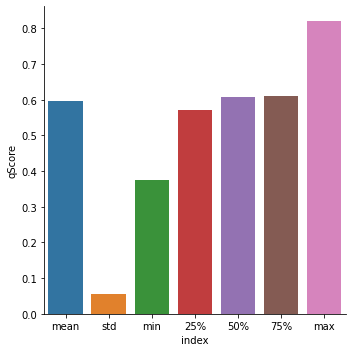

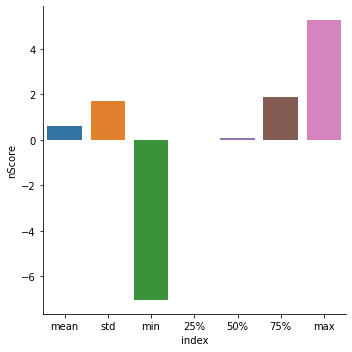

In [6]:
total_columns = df.columns
# store numerical and categorical column in two different variables. It comes handy during visualizaion.
num_col = df._get_numeric_data().columns
cat_col = list(set(total_columns)-set(num_col))

describe_num_df = df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col[1:]:
  if i in ['index']:
    continue
  sns.catplot(x="index", y=i, data=describe_num_df, kind="bar")
  plt.show()

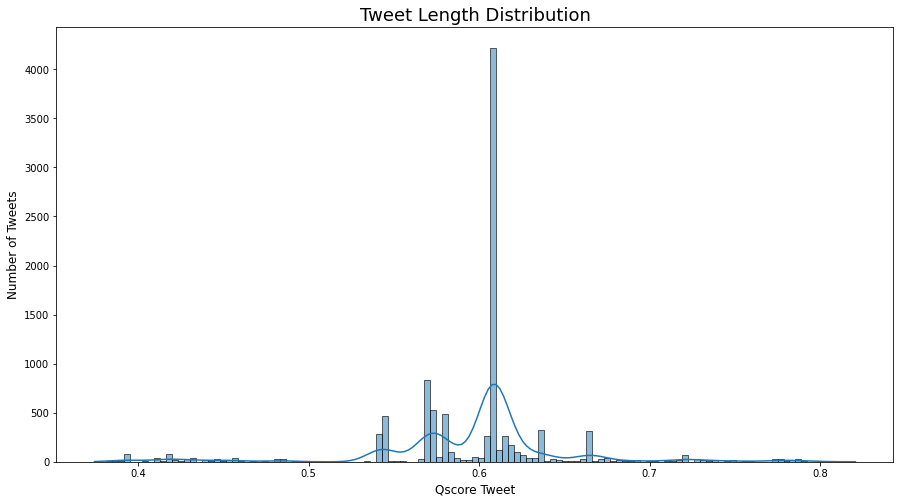

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.figure(figsize = (15,8))
sns.histplot(data=df,x=df['qScore'],stat='count',kde=True)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Qscore Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

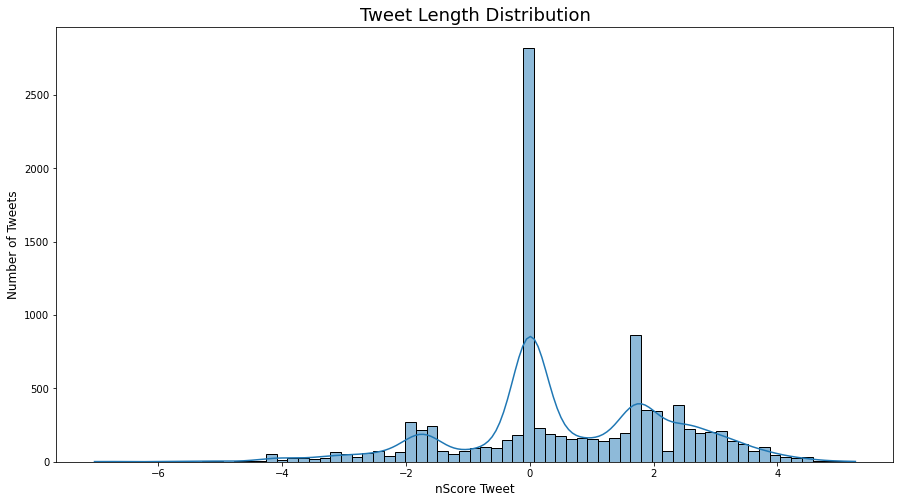

In [9]:
plt.figure(figsize = (15,8))
sns.histplot(data=df,x=df['nScore'],stat='count',kde=True)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('nScore Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [197]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data_initial = df.text.values.tolist()
data_words_initial = list(sent_to_words(data_initial))
print(data_words_initial[:1])


[['criterion', 'certainly', 'have', 'us', 'rights', 'to', 'the', 'restoration', 'but', 'very', 'unlikely', 'they', 'have', 'any', 'claim', 'to', 'uk', 'uhd', 'rights', 'alone', 'this', 'seems', 'more', 'like', 'cost', 'analysis', 'decision', 'by', 'the', 'bfi', 'or', 'else', 'they', 'determined', 'the', 'new', 'restoration', 'doesnt', 'merit', 'for', 'home', 'release', 'which', 'would', 'be', 'odd']]


221751 words total without text processing , with a vocabulary size of 27326
Max tweet length is 58


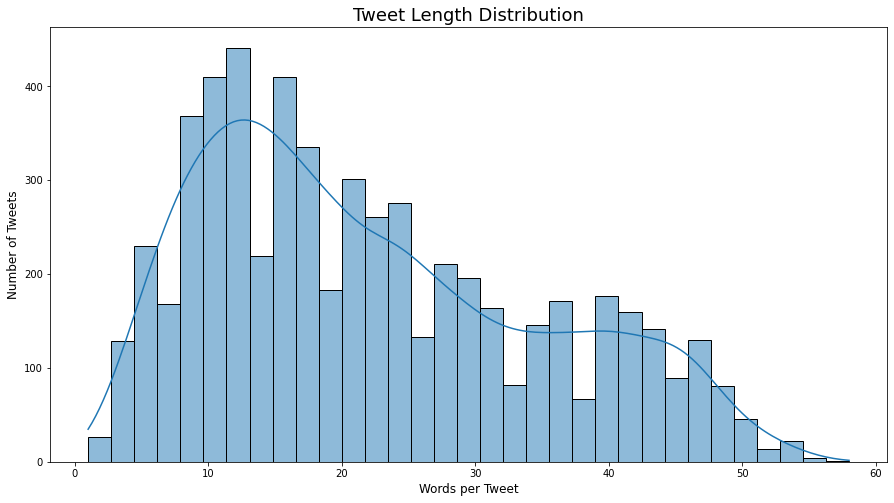

In [198]:

def plot_word_distribution(tweet_lengths):

  plt.figure(figsize = (15,8))
  sns.histplot(tweet_lengths,stat='frequency',kde=True)
  plt.title('Tweet Length Distribution', fontsize = 18)
  plt.xlabel('Words per Tweet', fontsize = 12)
  plt.ylabel('Number of Tweets', fontsize = 12)
  plt.show()

all_words_initial = [word for tokens in data_words_initial for word in tokens]
tweet_lengths_inital = [len(tokens) for tokens in data_words_initial]
vocab_inital = sorted(list(set(all_words_initial)))

print('{} words total without text processing , with a vocabulary size of {}'.format(len(all_words_initial), len(vocab_inital)))
print('Max tweet length is {}'.format(max(tweet_lengths_inital)))

plot_word_distribution(tweet_lengths_inital)

In [199]:
print('average tweet length is {}'.format(len(all_words_initial)/len(tweet_lengths_inital)))


average tweet length is 22.17288271172883


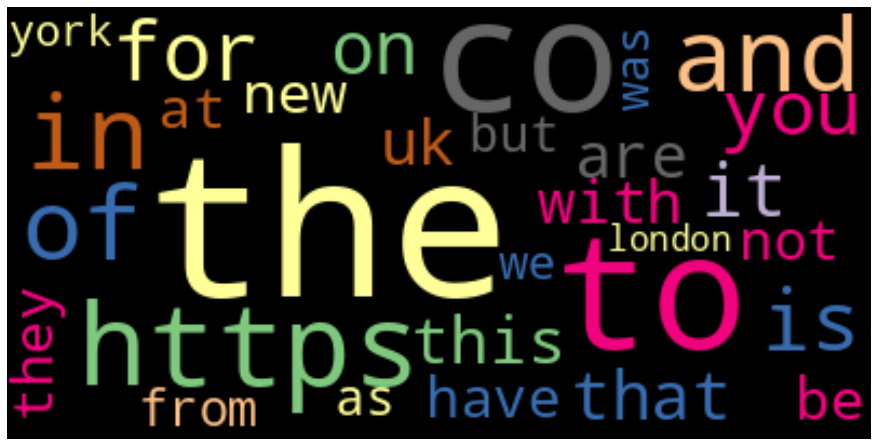

FreqDist({'the': 8528, 'to': 5143, 'co': 4852, 'https': 4811, 'and': 3882, 'in': 3857, 'of': 3677, 'is': 2407, 'for': 2322, 'you': 2109, ...})

In [13]:
#Create Word Cloud of top 30 words
#retrieve word and count from FreqDist tuples
from nltk.probability import FreqDist
word_freq = FreqDist(all_words_initial)
word_freq.most_common(25)
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('top_30_cloud.png')


plt.show()
word_freq

Check for any **duplicate tweets**:
There could be retweets with just same text. WE can remove such duplicates as they mean one and the same thing


In [12]:
# 10 most repeated tweets
def count_duplicate_frequency(input_df):
  return input_df.groupby(['text']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
init_dup = count_duplicate_frequency(df)
init_dup

text  counts
2589  @Reuters #bitcon rules without a ruler\n(a rul...      11
1515  @GBNEWS Instead of getting unskilled/semi-skil...       3
6216  Happy Birthday Bibi Aseefa Bhutto Zardari , Mo...       3
2443  @PeterObi CHECK HERE: UK Seasonal Work Visa An...       3
9040  We Need a #GeneralElectionNow #EnoughIsEnough ...       3
6135  Got 2x for Manchester United VS Crystal Palace...       2
2604  @Reuters Hi😘, I'm developing my page like Only...       2
5100  Anyone interested in buying my  X2 BEYONCÉ Sta...       2
2880  @SkyNews Hi😘, I'm developing my page like Only...       2
9107                        Well said Boris Johnson 👏👏👏       2

Let's look at one example of a duplicate tweet. For multiple duplicate tweets we'll keep tweet with highest newsworthiness and credibility score .(ALthough it won't make much difference if the text is same

In [13]:
by_text = df.groupby("text")
by_text.get_group("Well said Boris Johnson 👏👏👏")
# by_text.get_group("Well said Boris Johnson 👏👏👏")

_id  username                         text    qScore  \
3421  1621602479753367553  timmyvoe  Well said Boris Johnson 👏👏👏  0.634643   
3757  1621602658418040832  timmyvoe  Well said Boris Johnson 👏👏👏  0.634643   

      nScore  
3421     0.0  
3757     0.0

In [14]:
print("Most frequent tweet is ",init_dup.iloc[0,0]," with ",init_dup.iloc[0,1],"occurences")

by_text.get_group(init_dup.iloc[0,0])

Most frequent tweet is  @Reuters #bitcon rules without a ruler
(a rules engine to separate money from state)  with  11 occurences


_id username  \
1893  1621601638984155136  bruwaru   
3426  1621602481808543745  bruwaru   
3592  1621602563681296384  bruwaru   
3965  1621602770900975616  bruwaru   
4253  1621602924957663235  bruwaru   
4969  1621603276255895553  bruwaru   
5531  1621603574210764801  bruwaru   
6089  1621603882521460739  bruwaru   
7357  1621604560954351616  bruwaru   
7733  1621604789669838852  bruwaru   
7896  1621604897723383811  bruwaru   

                                                   text    qScore    nScore  
1893  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
3426  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
3592  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
3965  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
4253  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
4969  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
5531  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
6089  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
7357  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
7733  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375  
7896  @Reuters #bitcon rules without a ruler\n(a rul...  0.393056 -0.507375

Let's remove these dupliucate tweets

In [15]:
# dropping ALL duplicate values
df.drop_duplicates(subset="text",keep=False, inplace=True)

In [16]:
after_dup = count_duplicate_frequency(df)
print("No mode tweets with frequency > 1")
after_dup

No mode tweets with frequency > 1


text  counts
0     "#MeghanMarkIe pushing #PrinceHarry 'off the d...       1
6624  If any CWU member of Scotland No.2 Branch not ...       1
6617  If @joetsai1999 @BrooklynNets make Kevin Duran...       1
6618  If Aberdeen were playing Celtic tomorrow he’d ...       1
6619  If Biden shoots down the balloon, they'll say ...       1
6620  If I were Scott Perry as New York Knicks GM, I...       1
6621  If Liz truss comes back then it is incumbent o...       1
6622  If Manchester United ( @ManUtd ) can't respect...       1
6623  If You Bank With This New England Mutual Savin...       1
6625  If anybody has these skills please contact me ...       1

In [12]:
df.shape

(9932, 5)

In [17]:
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
# make new columns for mentioned usernames and hashtags
df['mentioned'] = df.text.apply(find_mentioned)
df['hashtags'] = df.text.apply(find_hashtags)

df.head()

_id         username  \
0  1621600585291014145    realJackEason   
1  1621600584360153088  ManojKu40226010   
2  1621600585358233600       TansyWatts   
3  1621600585391783943    Green_Man1984   
4  1621600586020933632   bruis3pristin3   

                                                text    qScore    nScore  \
0  @pansexualflower Criterion certainly have US r...  0.613271  2.934114   
1  🇨🇳 🇺🇸 #China\n#Chinese #Foreign #Ministry said...  0.446642 -2.994406   
2  “As they began to understand the children’s op...  0.609156  1.772004   
3  Excess Deaths Skyrocket Again In England And W...  0.608929 -1.639187   
4  @altgirlalterego scotland, seychelles, syria, ...  0.608089 -0.254614   

            mentioned                                           hashtags  
0  [@pansexualflower]                                                 []  
1                  []  [#China, #Chinese, #Foreign, #Ministry, #Penta...  
2                  []                                                 []  
3                  []                                                 []  
4  [@altgirlalterego]                                                 []

In [18]:
hash_freq = FreqDist([tag for s in df['hashtags'] for tag in s ])
hash_freq.most_common(25)

# plot_word_distribution( [len(tags) for tags in df['hashtags'] ] )

[('#London', 59),
 ('#UK', 45),
 ('#LHR', 45),
 ('#TOTP', 33),
 ('#eBay', 27),
 ('#GeneralElectionNow', 26),
 ('#totp', 25),
 ('#uk', 24),
 ('#Russia', 24),
 ('#NowPlaying', 23),
 ('#LiarJohnson', 21),
 ('#ToriesUnfitToGovern', 21),
 ('#Sunakout', 21),
 ('#SCFC', 20),
 ('#WHUFC', 19),
 ('#MUFC', 19),
 ('#MedicalJobs', 19),
 ('#EnoughIsEnough', 18),
 ('#NonDom', 18),
 ('#GreenCard', 18),
 ('#Moderna', 18),
 ('#michellemone', 18),
 ('#fraud', 18),
 ('#DominicRaab', 18),
 ('#PMQs', 18)]

Let's see what is the relation between newsworthiness score,credibility score and number of "mentioned" ,"Hashtags" in each tweet. Basically if a tweet has more number of hashtags, is it more credible?


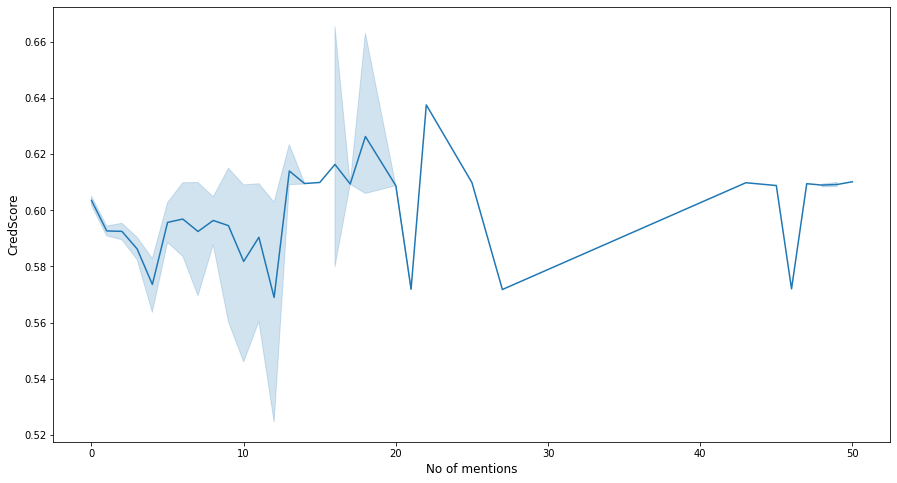

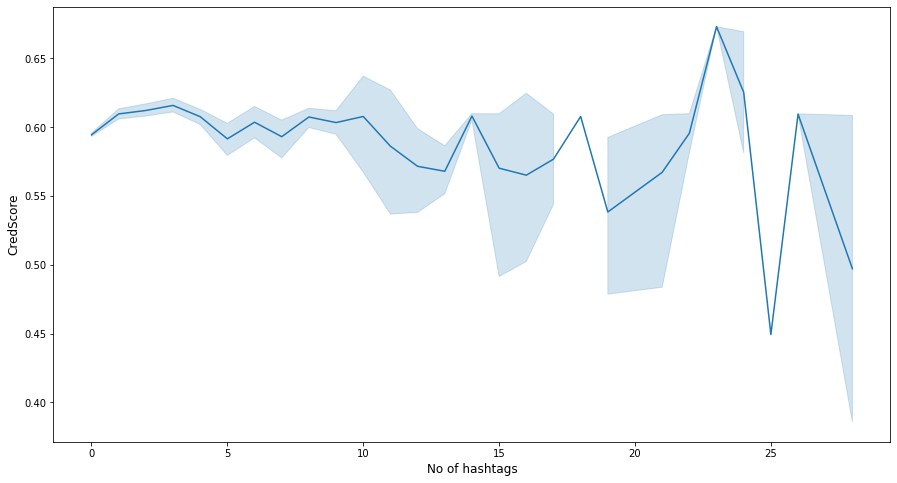

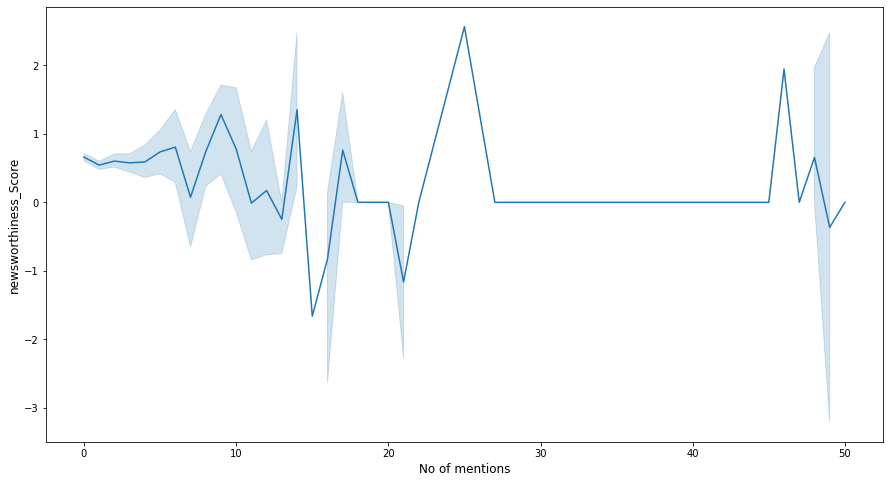

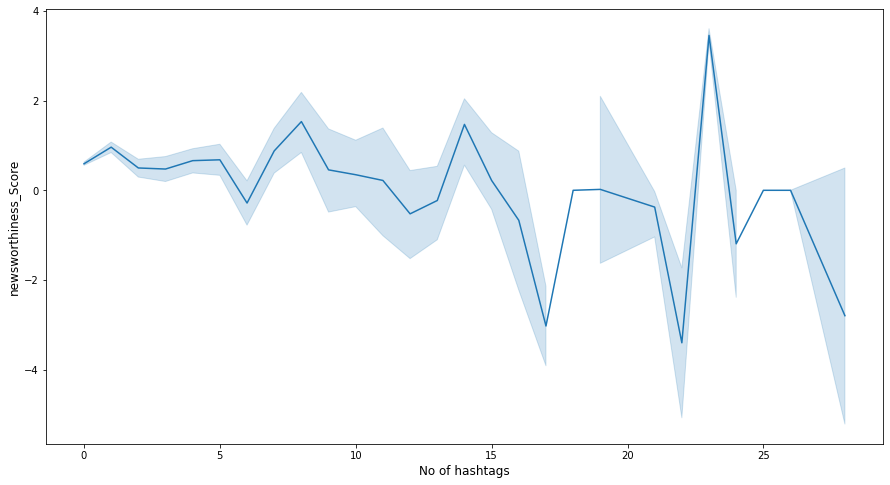

In [22]:

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
def plot_freq(data_in, x,y,xLabel,yLabel):
  plt.figure(figsize = (15,8))
  # sns.histplot(list_input,stat='frequency',kde=True)
  sns.lineplot(data=df, x=x, y=y)
  # plt.title('Tweet Length Distribution', fontsize = 18)
  plt.xlabel(xLabel, fontsize = 12)
  plt.ylabel(yLabel, fontsize = 12)
  plt.show()

list_of_mentions = [len(mentiones) for mentiones in df['mentioned']]
list_of_hashtags = [len(hashtags) for hashtags in df['hashtags']]
# print(min(list_of_mentions))

plot_freq(df,list_of_mentions,"qScore",'No of mentions','CredScore')
plot_freq(df,list_of_hashtags,"qScore",'No of hashtags','CredScore')

plot_freq(df,list_of_mentions,"nScore",'No of mentions','newsworthiness_Score')
plot_freq(df,list_of_hashtags,"nScore",'No of hashtags','newsworthiness_Score')





---



In [19]:
def get_number_of_urls(documents):
    print("{:.2f}% of documents contain urls".format(sum
(documents.apply(lambda x:x.find('http'))>0)/len
(documents)*100))
# Passing the 'Tweets' column of the dataframe as the argument
print(get_number_of_urls(df.text))

39.30% of documents contain urls
None


39.30% !!! That’s quite a lot of data. URLs don’t provide any information regarding the topics of a document. We will remove the urls from text using the below-mentioned function



Text Preprocessing functions


In [106]:
# 1.Remove URLS
def remove_urls(text):
    return re.sub(r'http\S+','', text)

# 2. To_lowerCase:
def to_lowercase(text):
    return text.lower()

# 3.Expand contractions such as don't --> do not
def expand_contractions(text):
    expanded_words = [] 
    for word in text.split():
       expanded_words.append(contractions.fix(word)) 
    return ' '.join(expanded_words)
#testing the function on a single sample for explaination
print(expand_contractions("Don't is same as do not"))
#expanding contractions for every row

# 4.Standardizing Accent Characters: Sometimes, people use accented characters like é, ö, etc. 
# to signify emphasis on a particular letter during pronunciation. In some instances, accent marks 
# also clarify the meanings of words, which might be different without accent marks. 
# Though the use of accent marks is very limited, it’s a good practice to convert these characters into standard ASCII characters.


def standardize_accented_chars(text):
 return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#testing the function on a single sample for explaination
print(standardize_accented_chars('Sómě words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.'))
#standardizing accented characters for every row

# 5. Remove mentions and tags
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)
#testing the function on a single sample for explaination
print(remove_mentions_and_tags('Some random @abc and #def'))
#removing mentions and tags from every row

# 6.Keep Alphanumeric
def keep_only_alphabet(text):
    return re.sub(r'[^a-z]', ' ' , text)
#testing the function on a single sample for explaination
print(keep_only_alphabet('just a bit more $$processing required.Just a bit!!!'))
#for all the rows

def remove_amp(text):
  return re.sub(r'amp','', text)



Do not is same as do not
Some words such as resume, cafe, protest, divorce, coordinate, expose, latte.
Some random  and 
just a bit more   processing required  ust a bit   


In [21]:

df.text=df.text.apply(remove_urls)
df.text=df.text.apply(to_lowercase)
df.text=df.text.apply(expand_contractions)
df.text=df.text.apply(standardize_accented_chars)
df.text=df.text.apply(remove_mentions_and_tags)
df.text=df.text.apply(keep_only_alphabet)
df.text=df.text.apply(remove_amp)


In [107]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [108]:
# Remove Stop Words
def remove_stopwords(text,nlp,custom_stop_words=None,
remove_small_tokens=True,min_len=2):
    # if custom stop words are provided, then add them to default stop words list
    if custom_stop_words:
        nlp.Defaults.stop_words |= custom_stop_words
    
    filtered_sentence =[] 
    doc=nlp(text)
    for token in doc:
        
        if token.is_stop == False: 
            
            # if small tokens have to be removed, then select only those which are longer than the min_len 
            if remove_small_tokens:
                if len(token.text)>min_len:
                    filtered_sentence.append(token.text)
            else:
                filtered_sentence.append(token.text)
    # if after the stop word removal, words are still left in the sentence, then return the sentence as a string else return null 
    return " ".join(filtered_sentence) if len(filtered_sentence)>0 else None
#creating a spaCy object. 
# nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
#removing stop-words and short words from every row


In [ ]:
df.text=df.text.apply(lambda x:remove_stopwords(x,nlp))

In [109]:
# Lemmatization
def lemmatize(text, nlp):
   doc = nlp(text)
   lemmatized_text = []
   for token in doc:
      lemmatized_text.append(token.lemma_)
   return " ".join(lemmatized_text)
#testing the function on a single sample for explaination
print(lemmatize('Reading about NLP  is fun.' ,nlp ))
#Performing lemmatization on every row


read about NLP   be fun .


In [ ]:
df.text=df.text.apply(lambda x:lemmatize(x,nlp))

In [110]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
      if word!='':
        words.append(word)
    return words
#storing the generated tokens in a new column named 'words'
# tweets_df['tokens']=tweets_df.Tweets.apply(generate_tokens)

In [ ]:
df['tokens'] = df.text.apply(generate_tokens)


In [26]:
# df['tokens'].isnull().sum()
# df['text'].isnull().sum()

# df.dropna()

0

102235 words total, with a vocabulary size of 15621
Max tweet length is 9932
average tweet length is 10.293495771244462


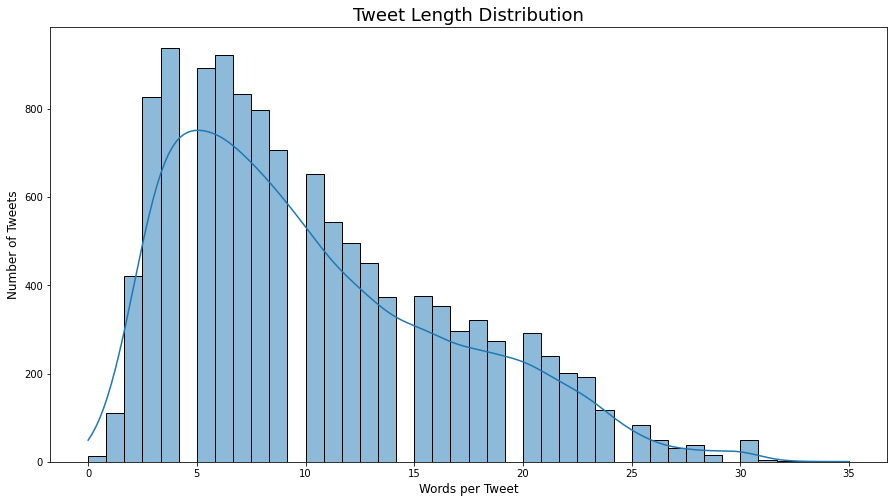

In [26]:
all_words = [word for tokens in df['tokens'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['tokens']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(len(tweet_lengths)))
print('average tweet length is {}'.format(len(all_words)/len(tweet_lengths)))


plt.figure(figsize = (15,8))
sns.histplot(tweet_lengths,stat='frequency',kde=True)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

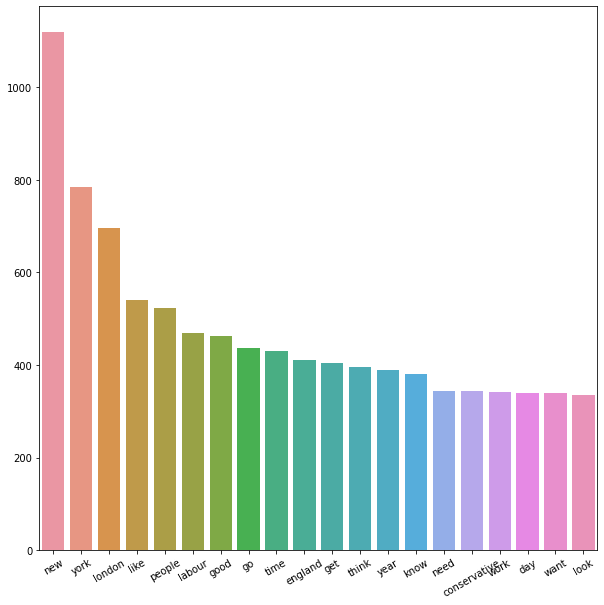

In [27]:
from nltk.probability import FreqDist
word_freq = FreqDist(all_words)
word_freq.most_common(25)
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(all_words).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

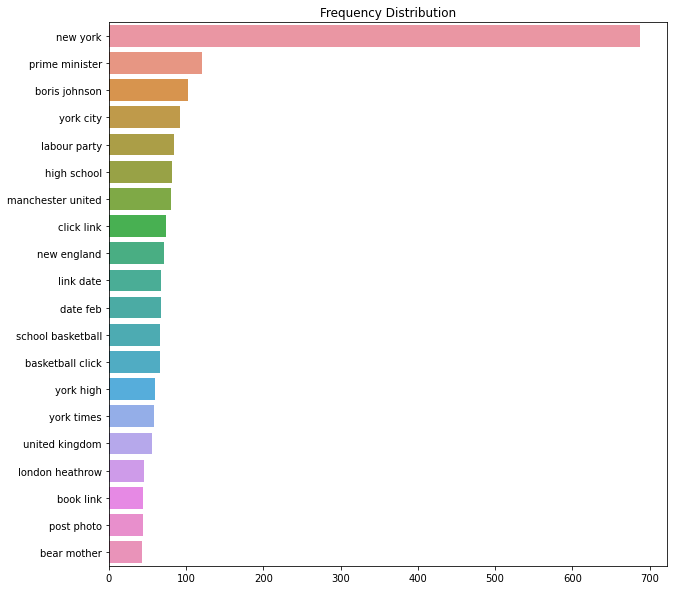

In [28]:
## Bigram method
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

## Generate bigrams
ngrams2 = bigrams(all_words)

## Creating FreqDist
ngram_fd2 = FreqDist(ngrams2).most_common(20)
ngram_fd2=dict(ngram_fd2)
# ## Sort values by highest frequency
ngram_sorted2 = {k:v for k,v in sorted(ngram_fd2.items(), key=lambda item:item[1], reverse=True)}

## Join bigram tokens with '_' + maintain sorting
ngram2_joined = {' '.join(k):v for k,v in sorted(ngram_fd2.items(), key=lambda item:item[1], reverse=True)}

## Convert to Pandas series for easy plotting
ngram2_freqdist = pd.Series(ngram2_joined)

## Setting figure & ax for plots
fig, ax = plt.subplots(figsize=(10,10))

## Setting plot to horizontal for easy viewing + setting title + display  
bar_plot = sns.barplot(x=ngram2_freqdist.values, y=ngram2_freqdist.index, orient='h', ax=ax)
plt.title('Frequency Distribution')
plt.show();

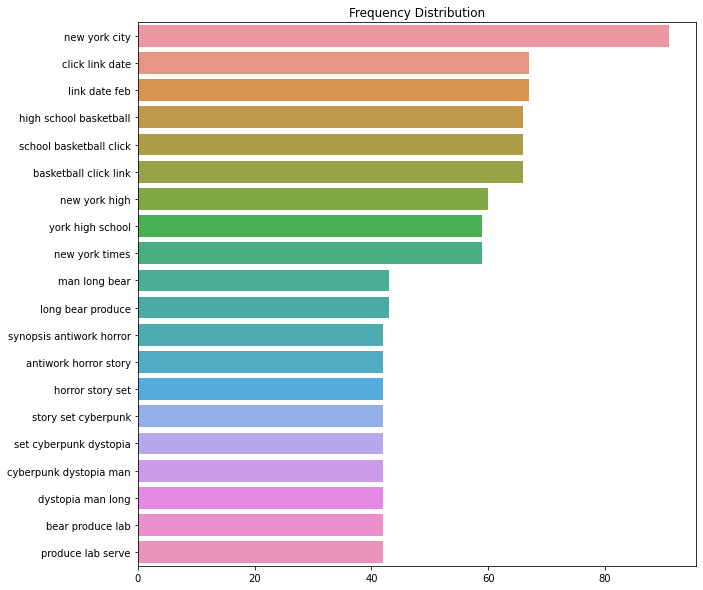

In [29]:
## tri method
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from nltk.util import ngrams


## Generate bigrams
ngrams = ngrams(all_words,3)

## Creating FreqDist
ngram_fd = FreqDist(ngrams).most_common(20)
ngram_fd=dict(ngram_fd)
# ## Sort values by highest frequency
ngram_sorted = {k:v for k,v in sorted(ngram_fd.items(), key=lambda item:item[1], reverse=True)}

## Join bigram tokens with '_' + maintain sorting
ngram_joined = {' '.join(k):v for k,v in sorted(ngram_fd.items(), key=lambda item:item[1], reverse=True)}

## Convert to Pandas series for easy plotting
ngram_freqdist = pd.Series(ngram_joined)

## Setting figure & ax for plots
fig, ax = plt.subplots(figsize=(10,10))

## Setting plot to horizontal for easy viewing + setting title + display  
bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax)
plt.title('Frequency Distribution')
plt.show();

In [30]:
df.head()

_id         username  \
0  1621600585291014145    realJackEason   
1  1621600584360153088  ManojKu40226010   
2  1621600585358233600       TansyWatts   
3  1621600585391783943    Green_Man1984   
4  1621600586020933632   bruis3pristin3   

                                                text    qScore    nScore  \
0  criterion certainly right restoration unlikely...  0.613271  2.934114   
1          say weather balloon deviate course say...  0.446642 -2.994406   
2  begin understand children operational scheme p...  0.609156  1.772004   
3  excess death skyrocket england wale          d...  0.608929 -1.639187   
4  scotland seychelle syria south africa south korea  0.608089 -0.254614   

            mentioned                                           hashtags  \
0  [@pansexualflower]                                                 []   
1                  []  [#China, #Chinese, #Foreign, #Ministry, #Penta...   
2                  []                                                 []   
3                  []                                                 []   
4  [@altgirlalterego]                                                 []   

                                              tokens  
0  [criterion, certainly, right, restoration, unl...  
1  [say, weather, balloon, deviate, course, say, ...  
2  [begin, understand, children, operational, sch...  
3  [excess, death, skyrocket, england, wale, deat...  
4  [scotland, seychelle, syria, south, africa, so...

In [27]:
data_words=list(df.tokens)
# data_words

In [47]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
# def remove_stopwords_alt(texts):
#     return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



In [49]:
# Remove Stop Words
# data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])



In [32]:
print(data_lemmatized[5])

['horse_race', 'history', 'today', 'race', 'day', 'news', 'history', 'extensive', 'horse', 'archive', 'present', 'thoroughbred', 'race', 'action', 'australian', 'overseas', 'racing', 'news', 'history']


In [35]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    # print(texts)
    # texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    # nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        # print(doc)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [36]:
# data_words[0]
# ngram2_joined 

data_ready[1]
# [bigram_mod[doc] for doc in data_words[0]]

['weather', 'deviate', 'course', 'military', 'threat']

In [ ]:
id2word_ngram = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus_gram = [id2word_ngram.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model_ngram = gensim.models.ldamodel.LdaModel(corpus=corpus_gram,
 id2word=id2word_ngram,
 num_topics=3,
 random_state=100,
 )




-8.549886570308146
nan


/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [ ]:
sample_perplexity_gram=lda_model_ngram.log_perplexity(corpus_gram);
sample_coherence__gram = CoherenceModel(model=lda_model_ngram, texts=data_ready, dictionary=id2word_ngram, coherence='c_v').get_coherence()

print(sample_perplexity_gram)
print(sample_coherence__gram)

-8.549886720741604
0.32503620395076


In [37]:
def create_dictionary(words):
    return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
id2word=create_dictionary(data_words)
print(id2word)

Dictionary<15621 unique tokens: ['analysis', 'bfi', 'certainly', 'claim', 'cost']...>


In [38]:
from gensim import models

def create_document_matrix(tokens,id2word):
  corpus = []

  for text in tokens:
      corpus.append(id2word.doc2bow(text))
  return corpus


#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df.tokens,id2word)
tfidf  = models.TfidfModel(corpus)

print(df.tokens[0])
print(corpus[0])
corpus_tfidf=tfidf[corpus]
# b
# for doc in b:
#     print(doc)

['criterion', 'certainly', 'right', 'restoration', 'unlikely', 'claim', 'uhd', 'right', 'like', 'cost', 'analysis', 'decision', 'bfi', 'determine', 'new', 'restoration', 'merit', 'home', 'release', 'odd']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 2), (16, 1), (17, 1)]


Sample model training



---



For K=3 and defult paramter settings

In [91]:
sample_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
 id2word=id2word,
 num_topics=5,
 random_state=100,
 )

sample_perplexity=sample_model.log_perplexity(corpus);
sample_coherence = CoherenceModel(model=sample_model, texts=df.tokens, dictionary=id2word, coherence='c_v').get_coherence()

sample_model_tf_idf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
 id2word=id2word,
 num_topics=5,
 random_state=100,
 )

sample_perplexity_tf_idf=sample_model_tf_idf.log_perplexity(corpus_tfidf)
sample_coherence_coherence = CoherenceModel(model=sample_model_tf_idf, texts=df.tokens, dictionary=id2word, coherence='c_v').get_coherence()

In [92]:
print(sample_perplexity)
print(sample_coherence)
print(sample_perplexity_tf_idf)
print(sample_coherence_coherence)

-8.840222226778641
0.23699593463648796
-10.435341070693902
0.2857083179171099


In [66]:
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)
get_lda_topics(sample_model,5,10)

Topic # 01  Topic # 02 Topic # 03 Topic # 04 Topic # 05
0          time         new        new        new     london
1        london        york       york     london     labour
2        labour        high    england         go     people
3          look      school       like    england      boris
4         party        like       want       york       year
5          good      people       come        man       need
6          like         feb        get       live        pay
7           set  basketball     united   scotland       work
8          book  livestream   minister       know      right
9  conservative        good       know       year      think

Sample topics for TF-IDF

In [67]:
get_lda_topics(sample_model_tf_idf,5,10)

Topic # 01  Topic # 02  Topic # 03    Topic # 04    Topic # 05
0       time         new         new        london        labour
1       bear  livestream        york        flight           new
2     london        york      london            go           pay
3      start        good        post       airport         right
4       look      school     england           new        people
5        new        date      united           spy          need
6       york  basketball  manchester          york         think
7        set        fall        come          link          tory
8       good       click       photo  conservative          like
9   minister  government        love      scotland  conservative

In [68]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

def pyldavis_show(model,corpus,id2word):
  vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word, mds="mmds", R=30)

  return vis
pyldavis_show(sample_model,corpus,id2word)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.102239 -0.116193       1        1  25.602593
2     -0.015573  0.134667       2        1  20.096237
0     -0.085831 -0.149578       3        1  18.923533
3     -0.163206  0.043489       4        1  18.834135
1      0.162370  0.087615       5        1  16.543501, topic_info=           Term         Freq        Total Category  logprob  loglift
648        york   712.000000   712.000000  Default  30.0000  30.0000
11          new  1028.000000  1028.000000  Default  29.0000  29.0000
985      school   165.000000   165.000000  Default  28.0000  28.0000
184        high   182.000000   182.000000  Default  27.0000  27.0000
980  basketball    91.000000    91.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
447        find    46.451916   169.393676   Topic5  -5.8974   0.5054
69       racing    40.587211    91.961990   Topic5  -6.0324   0.9813
444        play    44.276407   194.697616   Topic5  -5.9454   0.3182
457       leave    43.593268   171.015630   Topic5  -5.9609   0.4323
94       london    46.744685   646.155952   Topic5  -5.8912  -0.8272

[411 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
488       1  0.039501  academy
488       3  0.039501  academy
488       5  0.908526  academy
4662      3  0.943494   accept
2923      2  0.032242  address
...     ...       ...      ...
648       2  0.335475     york
648       3  0.054743     york
648       4  0.154403     york
648       5  0.394428     york
1005      4  0.962675      yrs

[864 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2])

In [69]:
pyldavis_show(sample_model_tf_idf,corpus_tfidf,id2word)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.041096  0.111610       1        1  26.318143
2     -0.023405 -0.115571       2        1  22.625794
0     -0.111805 -0.006843       3        1  18.945286
3      0.074045 -0.049973       4        1  16.815247
1      0.102260  0.060777       5        1  15.295530, topic_info=            Term       Freq      Total Category  logprob  loglift
179         bear  17.000000  17.000000  Default  30.0000  30.0000
156       flight  16.000000  16.000000  Default  29.0000  29.0000
525       united  28.000000  28.000000  Default  28.0000  28.0000
9278  livestream  10.000000  10.000000  Default  27.0000  27.0000
1746        post  28.000000  28.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
242         know   6.952358  44.727193   Topic5  -6.4340   0.0161
93          live   6.722427  38.601015   Topic5  -6.4676   0.1298
439       people   6.841605  52.355017   Topic5  -6.4501  -0.1574
427         want   6.295045  40.443290   Topic5  -6.5333   0.0175
167        great   5.974924  32.766206   Topic5  -6.5855   0.1758

[351 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4662      3  0.853880     accept
5891      3  0.873380      adult
3138      5  0.796593     afford
1013      2  0.864090  afternoon
334       4  0.895235    airport
...     ...       ...        ...
648       1  0.220551       york
648       2  0.376234       york
648       3  0.155683       york
648       4  0.116762       york
648       5  0.129736       york

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2])

So using BoW and TF-IDF representation doesnt; make much difference in this case although perplexity scores were decreased. Let's see the best paramter setting for this.



---



checking for optimal K value for BoW Corpus

In [111]:
!pip install gensim==3.8.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-3.8.3-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [40]:

import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version   
install_java()

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
--2023-03-22 22:22:52--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2023-03-22 22:22:52--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  42.5MB/s    in 0.4s    

2023-03-22 22:22:53 (42.5 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/161847

In [110]:


os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [114]:
from gensim.models.wrappers import LdaMallet
def compute_coh_per_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values = []
    mallet_models = dict()
    for num_topics in range(start, limit, step):
        print("Type: Mallet | Topics: "+str(num_topics))
        model_mallet = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, workers=2)

        # model_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, workers=2)
        mallet_models[num_topics] = model_mallet
        coherencemodel = CoherenceModel(model=model_mallet, texts=df.tokens, dictionary=dictionary, coherence='c_v')
        coherence_Score=coherencemodel.get_coherence()
        coherence_values.append(coherence_Score)

        lda_model_2 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_mallet)
        perplex_score=lda_model_2.log_perplexity(corpus)
        print('scores are ',perplex_score,' ',coherence_Score)
        perplexity_values.append(perplex_score)
        
    #     ldamodel1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
    #                                        id2word=id2word,
    #                                        num_topics=num_topics, 
    #                                        random_state=100,
    #                                        update_every=1,
    #                                        chunksize=100,
    #                                        passes=10,
    #                                        alpha='symmetric',
    #                                        iterations=100,
    #                                        per_word_topics=True)
    #     mallet_models[num_topics] = ldamodel1
    # # ldamodel=Lda(corpus, num_topics=i, id2word=id2word, passes=15, iterations=200, random_state=0)

    #     perplexity_values.append(ldamodel1.log_perplexity(corpus)) 
    #     coherence_values.append(CoherenceModel(model=ldamodel1, texts=df.tokens, dictionary=dictionary, coherence='c_v').get_coherence()) 
    return mallet_models, coherence_values,perplexity_values


# Show graph
model_list, coherence_values,perplexity_score = compute_coh_per_values(dictionary=id2word, corpus=corpus,texts=df.tokens , start=2, limit=40, step=6)
# model_list, coherence_values,perplexity_score = compute_coh_per_values(dictionary=id2word, corpus=corpus,texts=df.tokens ,limit=3, start=2,  step=1)



In [103]:
# gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_list[2]).log_perplexity(corpus)
# perplexity_score

[-8.769245844872085]

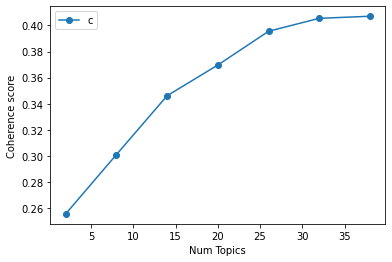

In [45]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values,marker='o')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
coh_list=[x,coherence_values]
df_coh = pd.DataFrame (coh_list).transpose()
df_coh.columns = ['K', 'Coherence Score']
print (df_coh)
# products_list = [['laptop', 'printer', 'tablet', 'desk', 'chair'],[1300, 150, 300, 450, 200]]

# df = pd.DataFrame (products_list).transpose()
# df.columns = ['product_name', 'price']
# print (df)

      K  Coherence Score
0   2.0         0.255543
1   8.0         0.300983
2  14.0         0.346136
3  20.0         0.369683
4  26.0         0.395564
5  32.0         0.405486
6  38.0         0.407071


Perplexity Scores

In [120]:
def compute_coh_per_values2(dictionary, corpus, texts, limit, start=2, step=3):
    perplexity_values = []
    mallet_models = dict()
    for num_topics in range(start, limit, step):
        print("Type: LDA | Topics: "+str(num_topics))
        ldamodel1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
        # model_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, workers=2)
        mallet_models[num_topics] = ldamodel1
        
        perplex_score=ldamodel1.log_perplexity(corpus)
        print('scores are ',perplex_score)
        perplexity_values.append(perplex_score)
    return mallet_models,perplexity_values


# Show graph
model_list2,perplexity_scores_lda = compute_coh_per_values2(dictionary=id2word, corpus=corpus,texts=df.tokens , start=2, limit=40, step=6)
# model_list, coherence_values,perplexity_score = compute_coh_per_values(dictionary=id2word, corpus=corpus,texts=df.tokens ,limit=3, start=2,  step=1)


In [42]:
perplexity_scores_lda_new=[None]*len(perplexity_scores_lda)
for i in range(len(perplexity_scores_lda)):
  perplexity_scores_lda_new[i] = np.exp2(-perplexity_scores_lda[i])
perplexity_scores_lda_new

[436.32092234341775,
 840.5330572995794,
 19011.021019511183,
 2475579.3350172318,
 35928201.5661259,
 519287815.5146699,
 7772286223.462784]

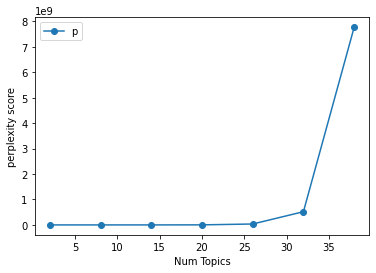

In [46]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, perplexity_scores_lda_new,marker='o')
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_score"), loc='best')
plt.show()

In [48]:
plx_list=[x,perplexity_scores_lda_new]
df_plx = pd.DataFrame (plx_list).transpose()
df_plx.columns = ['K', 'perplexity Score']
print (df_plx)

      K  perplexity Score
0   2.0      4.363209e+02
1   8.0      8.405331e+02
2  14.0      1.901102e+04
3  20.0      2.475579e+06
4  26.0      3.592820e+07
5  32.0      5.192878e+08
6  38.0      7.772286e+09


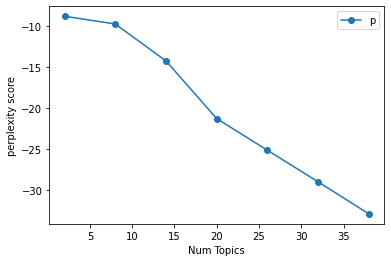

In [49]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, perplexity_scores_lda,marker='o')
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_score"), loc='best')
plt.show()

Best K = 14 using Elbow method and balancing the perplexity and coherence score

In [58]:
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)


In [50]:
K14Model = model_list2[14]

K14Model.show_topics()

[(4,
  '0.109*"people" + 0.093*"need" + 0.041*"read" + 0.036*"february" + 0.033*"brexit" + 0.031*"red" + 0.030*"join" + 0.027*"ask" + 0.022*"attack" + 0.021*"tonight"'),
 (2,
  '0.058*"live" + 0.048*"support" + 0.033*"thank" + 0.030*"school" + 0.025*"long" + 0.023*"help" + 0.022*"use" + 0.019*"maybe" + 0.019*"total" + 0.018*"book"'),
 (10,
  '0.102*"labour" + 0.077*"know" + 0.047*"world" + 0.038*"let" + 0.038*"find" + 0.038*"stop" + 0.020*"sure" + 0.017*"culture" + 0.017*"consider" + 0.017*"etc"'),
 (0,
  '0.067*"want" + 0.066*"day" + 0.052*"boris" + 0.044*"leave" + 0.042*"great" + 0.038*"watch" + 0.036*"way" + 0.025*"wait" + 0.025*"johnson" + 0.024*"tomorrow"'),
 (11,
  '0.094*"good" + 0.037*"country" + 0.034*"high" + 0.033*"war" + 0.033*"check" + 0.026*"set" + 0.026*"win" + 0.024*"ukraine" + 0.022*"union" + 0.019*"bristol"'),
 (7,
  '0.054*"year" + 0.046*"come" + 0.027*"ticket" + 0.025*"manchester" + 0.023*"week" + 0.019*"date" + 0.017*"tell" + 0.017*"fight" + 0.017*"minister" + 0.01

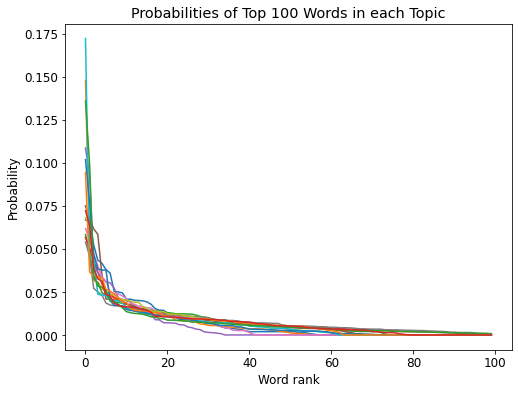

In [51]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

# top 100 words by weight in each topic
top_n_words = 100
n_topics=14
topics = K14Model.show_topics(
    num_topics = n_topics, num_words = top_n_words, formatted = False)

for _, infos in topics:
    probs = [prob for _, prob in infos]
    plt.plot(range(top_n_words), probs)

plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')
plt.show()

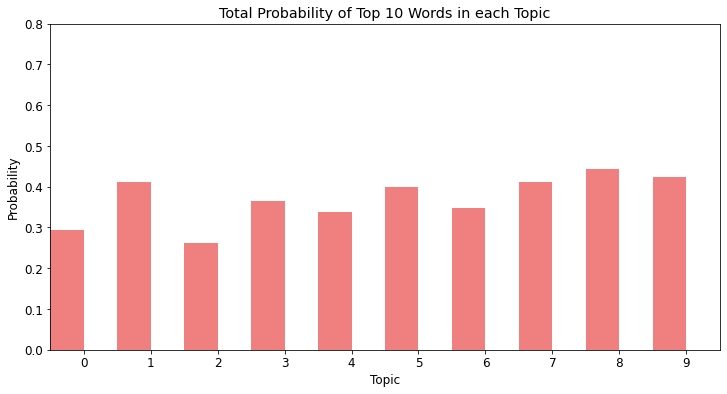

In [53]:
# total weight assigned by each topic to its top 10 words
plt.rcParams['figure.figsize'] = 12, 6 
plt.rcParams['font.size'] = 12
top_probs = []
top_n_words = 10
topics = K14Model.show_topics(num_words = top_n_words, formatted = False)
for _, infos in topics:
    prob = sum([prob for _, prob in infos])
    top_probs.append(prob)

ind = np.arange(top_n_words)
width = 0.5

fig, ax = plt.subplots()

ax.bar(ind - (width / 2), top_probs, width, color = 'lightcoral')
ax.set_xticks(ind)
# plt.set_ylim([0.0, 0.25])

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Total Probability of Top 10 Words in each Topic')
plt.xlim(-0.5, 9.5)
plt.ylim(0, 0.80)
plt.show()


In [73]:
# Let's check the score on bigram model: 

bigram_dictionary =create_dictionary(data_lemmatized)
corpus_bigram = create_document_matrix(data_lemmatized,bigram_dictionary)
model_list2_bigram,perplexity_scores_lda_bigram = compute_coh_per_values2(dictionary=bigram_dictionary, corpus=corpus_bigram,texts=data_lemmatized , start=2, limit=40, step=6)


Type: LDA | Topics: 2
scores are  -8.646771837273045
Type: LDA | Topics: 8
scores are  -9.565804648253478
Type: LDA | Topics: 14
scores are  -14.328225000696316
Type: LDA | Topics: 20
scores are  -21.878153193491237
Type: LDA | Topics: 26
scores are  -25.971314085709295
Type: LDA | Topics: 32
scores are  -30.230215916166976
Type: LDA | Topics: 38
scores are  -34.5264326626622


In [77]:
model_list_bigram, coherence_values_bi,perplexity_score_bi = compute_coh_per_values(dictionary=bigram_dictionary, corpus=corpus_bigram,texts=data_lemmatized , start=2, limit=40, step=6)


Type: Mallet | Topics: 2


/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1108: RuntimeWarning: invalid value encountered in multiply
  score += np.sum((self.eta - _lambda) * Elogbeta)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1109: RuntimeWarning: invalid value encountered in subtract
  score += np.sum(gammaln(_lambda) - gammaln(self.eta))


scores are  nan   0.16684568788193788
Type: Mallet | Topics: 8


/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


scores are  nan   nan
Type: Mallet | Topics: 14
scores are  nan   nan
Type: Mallet | Topics: 20
scores are  nan   nan
Type: Mallet | Topics: 26
scores are  nan   nan
Type: Mallet | Topics: 32
scores are  nan   nan
Type: Mallet | Topics: 38
scores are  nan   nan


In [75]:
def plot_score(start, limit, step,list_score,measure):
  limit=limit; start=start; step=step;
  x = range(start, limit, step)
  plt.plot(x, list_score,marker='o')
  plt.xlabel("Num Topics")
  plt.ylabel(measure+" score")
  plt.legend((measure), loc='best')
  plt.show()



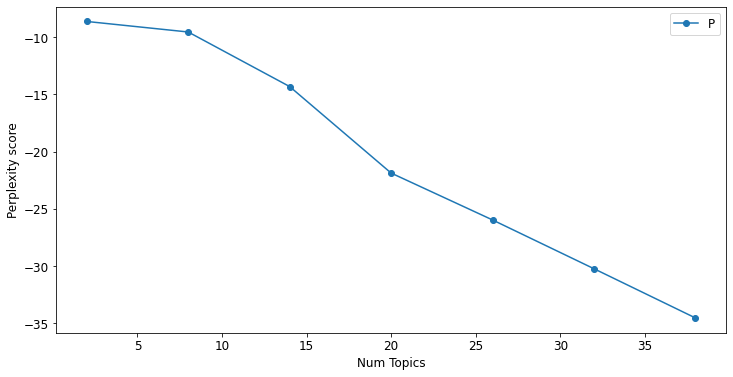

In [76]:
plot_score(2,40,6,perplexity_scores_lda_bigram,'Perplexity')


Discrding bigram model and using K14 best from hereon

In [86]:
get_lda_topics(model_list_bigram[8],8,10)
# plot_score(2,40,6,coherence_values_bi,'Coherence')


Topic # 01 Topic # 02    Topic # 03 Topic # 04 Topic # 05 Topic # 06  \
0     skilled     listen  thoroughbred    realise       visa   jouvenel   
1      review       time   agriculture   downland   rainfall     autism   
2       james       long   restoration       tree        end        act   
3        wild       nlaw    industrial     review     retail      order   
4     nations       baby       weekend       baby   rhapsody     corner   
5       bleed       fuck        refund    appoint    souffle   children   
6       union   giveaway       divorce       path       fact     europe   
7  discussion       ripe     seychelle    glasgow    comment     weekly   
8        area      murad       awesome      round       tear   remember   
9       blast     sophie          cold      reffe      floor        buy   

   Topic # 07 Topic # 08  
0      yearly    england  
1       merit   register  
2  apparently     boeing  
3     tonight     excite  
4     liberal      heart  
5        good      bless  
6       world     action  
7   socialist    service  
8      threat     africa  
9        home   impunity

In [87]:
get_lda_topics(model_list[8],8,10)


Topic # 01 Topic # 02 Topic # 03    Topic # 04  Topic # 05    Topic # 06  \
0     london       york     people          vote        year          time   
1        day       play     labour          stop  manchester       england   
2       city       high       good          free      ticket      scotland   
3   minister        feb       tory         money       leave  conservative   
4      great     school      party          news         win          find   
5      today       link    support         power  government         thing   
6       post       team      world          life      united         start   
7      prime      check    country  conservative        sell         state   
8   february       game        bad        public        home          wale   
9     flight       race      point          sign         buy          give   

  Topic # 07 Topic # 08  
0       live       work  
1        man      boris  
2       love        pay  
3        big       week  
4       long    johnson  
5      watch        lot  
6       book       hope  
7      woman       join  
8      story      night  
9        set    ukraine

Hyperparamter tuning:


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
best_topic_model_alpha_high = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=10,
                                           iterations=100,
                                           per_word_topics=True)
best_topic_model_alpha_low = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.001,
                                           iterations=100,
                                           per_word_topics=True)
best_model_default = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
id2word[0]

'analysis'

In [ ]:
from operator import itemgetter

def sort_doc_topics(topic_model, doc):
    """
    given a gensim LDA topic model and
    a document, obtain the predicted probability
    for each topic in sorted order
    """
    bow = topic_model.id2word.doc2bow(doc)
    
    # the default minimum_probability will clip out topics that
    # have a probability that's too small will get chopped off, 
    # which is not what we want here
    doc_topics = topic_model.get_document_topics(bow, minimum_probability = 0)
    doc_topics.sort(key = itemgetter(1), reverse = True)
    probs = [prob for _, prob in doc_topics]
    return probs

sample_doc = df.tokens[0]
alpha_low = sort_doc_topics(best_topic_model_alpha_low, sample_doc)
alpha_default = sort_doc_topics(best_model_default, sample_doc)
alpha_high = sort_doc_topics(best_topic_model_alpha_high, sample_doc)

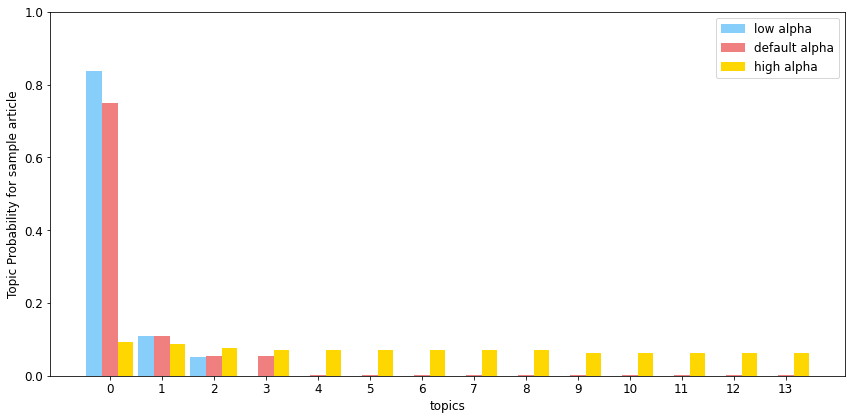

In [ ]:
def param_barplot(a, b, c, ylim, param, ylab):
    """
    plotting function for three topic models that
    have a different `param` value
    """
    width = 0.3
    ind = np.arange(len(a))      
    fig = plt.figure()
    ax = fig.add_subplot(111)
    b1 = ax.bar(ind, a, width, color = 'lightskyblue')
    b2 = ax.bar(ind + width, b, width, color = 'lightcoral')
    b3 = ax.bar(ind + (2 * width), c, width, color = 'gold')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(range(len(a)))
    ax.set_ylabel(ylab)
    ax.set_xlabel('topics')
    ax.set_ylim(0, ylim)
    ax.legend(handles = [b1, b2, b3], 
              labels = ['low ' + param, 'default ' + param, 'high ' + param])
    plt.tight_layout()
    plt.show()

param_barplot(alpha_low, alpha_default, alpha_high,
              ylim = 1.0, param = 'alpha',
              ylab = 'Topic Probability for sample article')

In [ ]:
best_topic_model_eta_high = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           eta=10,
                                           iterations=100,
                                           per_word_topics=True)
best_topic_model_eta_low = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           eta=0.001,
                                           iterations=100,
                                           per_word_topics=True)
best_model_eta_default = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           eta='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
def get_top_word_weight(topic_model, n_topics, top_n_words):
    """
    total weight assigned by each topic to its top `top_n_words` words
    """
    top_probs = []
    topics = topic_model.show_topics(num_topics = n_topics, 
                                     num_words = top_n_words, 
                                     formatted = False)
    for _, infos in topics:
        prob = sum([prob for _, prob in infos])
        top_probs.append(prob)

    return top_probs

In [ ]:
top_n_words = 10
eta_low_top = get_top_word_weight(best_topic_model_eta_low, n_topics, top_n_words)
eta_default_top = get_top_word_weight(best_model_eta_default, n_topics, top_n_words)
eta_high_top = get_top_word_weight(best_topic_model_eta_high, n_topics, top_n_words)

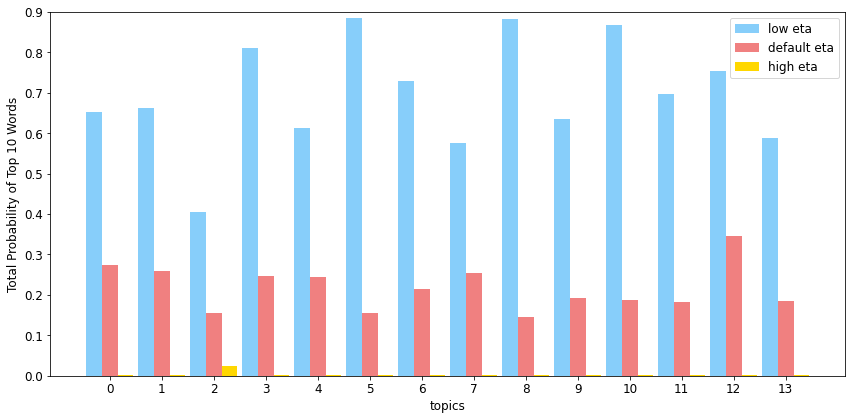

In [ ]:
param_barplot(eta_low_top, eta_default_top, eta_high_top,
              ylim = 0.90, param = 'eta',
              ylab = 'Total Probability of Top 10 Words')

In [90]:
# supporting function
def compute_coherence_perplex_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df.tokens, dictionary=id2word, coherence='c_v')
    perplex=lda_model.log_perplexity(corpus)
    # coherence_model_lda.
    return coherence_model_lda.get_coherence(),perplex





In [91]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 8
max_topics = 16
step_size = 2
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.001, 0.005))
alpha.append('symmetric')
# alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.001))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
# corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
#                corpus]

corpus_sets = [corpus]
corpus_title = ['100% Corpus']

# corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Perplexity':[]
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv,plx = compute_coherence_perplex_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    model_results['Perplexity'].append(plx)
                    
                    pbar.update(1)
    pbar.close()

# model_list2,perplexity_scores_lda = compute_coh_per_values2(dictionary=id2word, corpus=corpus,texts=df.tokens , start=2, limit=40, step=6)



  0%|          | 0/16 [00:48<?, ?it/s]
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1108: RuntimeWarning: invalid value encountered in multiply
  score += np.sum((self.eta - _lambda) * Elogbeta)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1109: RuntimeWarning: invalid value encountered in subtract
  score += np.sum(gammaln(_lambda) - gammaln(self.eta))

100%|██████████| 16/16 [13:48<00:00, 51.77s/it]


In [92]:
pd.DataFrame(model_results).to_csv('/content/lda_tuning_results_new.csv', index=False)


In [93]:
tuning = pd.read_csv('/content/lda_tuning_results_new.csv')
tuning.head()

Validation_Set  Topics      Alpha       Beta  Coherence  Perplexity
0    100% Corpus       8      0.001        0.0   0.352864         NaN
1    100% Corpus       8      0.001  symmetric   0.351302  -11.310791
2    100% Corpus       8  symmetric        0.0   0.333745         NaN
3    100% Corpus       8  symmetric  symmetric   0.331332   -9.658966
4    100% Corpus      10      0.001        0.0   0.344292         NaN

In [98]:
# tuning.groupby[['Topics','Alpha']]
by_tuning = tuning.groupby("Alpha")

a=by_tuning.get_group(tuning.iloc[0,2])
a

Validation_Set  Topics  Alpha       Beta  Coherence  Perplexity
0     100% Corpus       8  0.001        0.0   0.352864         NaN
1     100% Corpus       8  0.001  symmetric   0.351302  -11.310791
4     100% Corpus      10  0.001        0.0   0.344292         NaN
5     100% Corpus      10  0.001  symmetric   0.385498  -12.166908
8     100% Corpus      12  0.001        0.0   0.387400         NaN
9     100% Corpus      12  0.001  symmetric   0.399257  -14.473338
12    100% Corpus      14  0.001        0.0   0.388588         NaN
13    100% Corpus      14  0.001  symmetric   0.378784  -19.187938



---



In [53]:
# best_lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=12, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='symmetric',
#                                            eta='symmetric')

best_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=100,
                                           chunksize=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='symmetric',
                                           eta='symmetric',
                                           per_word_topics=True)
get_lda_topics(best_lda_model,12,10)

Topic # 01  Topic # 02 Topic # 03 Topic # 04 Topic # 05 Topic # 06  \
0      boris        time       come        new       good     london   
1        way        look     brexit       york        say    england   
2        big         see      price       work       know       live   
3      money        news      maybe        pay       need       year   
4       wait       thing      month     united    support   scotland   
5    johnson  manchester       join       make     people        feb   
6   tomorrow        like      north      times    country       city   
7       face        well       turn     dublin        war      watch   
8       hope        free        bit        add      thank     school   
9      putin       point        ask       hard       week       game   

   Topic # 07  Topic # 08 Topic # 09 Topic # 10 Topic # 11    Topic # 12  
0      labour        link        man        day      world         think  
1        tory        play        try      right        let          like  
2        vote      ticket       high       want       stop           get  
3       party       night     family      great    liberal        people  
4      police       click        set      leave       list  conservative  
5  government    minister        win       take      black            go  
6        fund        sell     flight        bad    culture          love  
7    election  livestream      fight       post        etc         check  
8        care       woman    bristol      state     russia          find  
9     million        talk       book       read        ago        public

In [54]:
   print(CoherenceModel(model=best_lda_model, texts=df.tokens, dictionary=id2word, coherence='c_v').get_coherence())
   print(best_lda_model.log_perplexity(corpus))

0.38125029345936784
-11.546723437087325


In [100]:
best_lda_model_bigram = gensim.models.LdaMulticore(corpus=corpus_bigram,
                                           id2word=bigram_dictionary,
                                           num_topics=12, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           eta='symmetric')
get_lda_topics(best_lda_model_bigram,12,10)

# bigram_dictionary =create_dictionary(data_lemmatized)
# corpus_bigram = create_document_matrix(data_lemmatized,bigram_dictionary)

Topic # 01 Topic # 02    Topic # 03  Topic # 04 Topic # 05 Topic # 06  \
0        new        say           try       world         go      right   
1       work       know          stop    tomorrow       come       live   
2       lose        get  conservative        race        day       need   
3      money       take        police       night       time     ticket   
4       make      issue        family         big      thing       link   
5      bring      party         state        plan       news       sell   
6      fight       hear          cost         car       love      train   
7        buy       free          post     tonight        bad  link_date   
8       life       well          long       sleep       work       home   
9        use   election         drive  absolutely      start      sunak   

   Topic # 07 Topic # 08    Topic # 09 Topic # 10 Topic # 11 Topic # 12  
0      labour       year        people        man      think      great  
1        tory       play          want       find       good      check  
2         pay    support       country    england        see        let  
3        vote      thank          mean       give        war        way  
4       leave       week        happen      child    believe       help  
5  government       game        public       care       look       read  
6        tell       team       liberal   scotland       book     people  
7       woman        set  conservative       seat     charge       join  
8        true       fund      business      crime     listen       city  
9        rise      watch          lead     worker      price       save

In [145]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

def pyldavis_show(model,corpus,id2word):
  vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word, mds="mmds", R=30)

  return vis


In [42]:
pyldavis_show(best_lda_model,corpus,id2word)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.402039  0.135533       1        1  11.716104
9      0.350184 -0.234317       2        1  10.489564
4     -0.352162 -0.235705       3        1  10.294521
5     -0.081890 -0.406214       4        1  10.042113
3     -0.109991  0.100062       5        1   9.999925
8     -0.395189  0.092571       6        1   9.167860
1      0.227656 -0.012882       7        1   7.468039
6      0.115394 -0.296682       8        1   7.254839
2      0.192876  0.315980       9        1   6.820533
0     -0.001683  0.348925      10        1   6.183975
7     -0.219396  0.297117      11        1   5.680563
10    -0.127837 -0.104388      12        1   4.881964, topic_info=         Term         Freq        Total Category  logprob  loglift
11        new  1294.000000  1294.000000  Default  30.0000  30.0000
94     london   960.000000   960.000000  Default  29.0000  29.0000
648      york   948.000000   948.000000  Default  28.0000  28.0000
203    labour   510.000000   510.000000  Default  27.0000  27.0000
41    england   553.000000   553.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
54      south    44.767155    45.832206  Topic12  -4.7139   2.9961
2289  protect    43.730439    44.795500  Topic12  -4.7374   2.9956
200     india    41.299940    42.365013  Topic12  -4.7945   2.9942
743     level    40.597512    41.662571  Topic12  -4.8117   2.9937
2491     rich    40.442114    41.507167  Topic12  -4.8155   2.9936

[407 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1442      9  0.991285        able
151       6  0.991632  absolutely
56        5  0.983349      action
356       5  0.994715         add
893       2  0.983435         age
...     ...       ...         ...
259       9  0.978899        yeah
49        2  0.340400        year
49        4  0.655585        year
2216      1  0.992100         yes
648       5  0.998703        york

[383 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 10, 5, 6, 4, 9, 2, 7, 3, 1, 8, 11])

In [103]:
pyldavis_show(best_lda_model_bigram,corpus_bigram,bigram_dictionary)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.377916  0.157126       1        1  12.346695
1     -0.185963  0.339442       2        1  10.493950
0      0.303025 -0.230810       3        1   9.358082
7      0.053985  0.397316       4        1   9.011059
8     -0.096134  0.048300       5        1   8.904016
6     -0.374491 -0.105992       6        1   8.721204
2      0.197855  0.023477       7        1   8.532312
9      0.409341  0.033018       8        1   7.731145
11    -0.236715 -0.312739       9        1   7.712952
10     0.110001 -0.377190      10        1   6.285080
5      0.231421  0.261694      11        1   6.090955
3     -0.034409 -0.233641      12        1   4.812549, topic_info=            Term        Freq       Total Category  logprob  loglift
271        think  461.000000  461.000000  Default  30.0000  30.0000
211         good  457.000000  457.000000  Default  29.0000  29.0000
70            go  446.000000  446.000000  Default  28.0000  28.0000
331       people  592.000000  592.000000  Default  27.0000  27.0000
402       labour  347.000000  347.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
389         host   23.044112   24.075649  Topic12  -4.9949   2.9902
720    beautiful   22.967547   23.999083  Topic12  -4.9983   2.9900
765  performance   22.433575   23.465107  Topic12  -5.0218   2.9890
314      comment   21.716147   22.747685  Topic12  -5.0543   2.9875
598          big  109.087710  168.626600  Topic12  -3.4402   2.5984

[428 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2268     11  0.965912   able_view
110      12  0.985896  absolutely
1881      6  0.985452     account
42        1  0.982054      action
669       7  0.982754    actually
...     ...       ...         ...
1638      8  0.977902       worth
1084      2  0.984182       wrong
41        3  0.239132        year
41        4  0.757252        year
902       9  0.973610       young

[410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 8, 9, 7, 3, 10, 12, 11, 6, 4])



---



**Visualising topics**

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


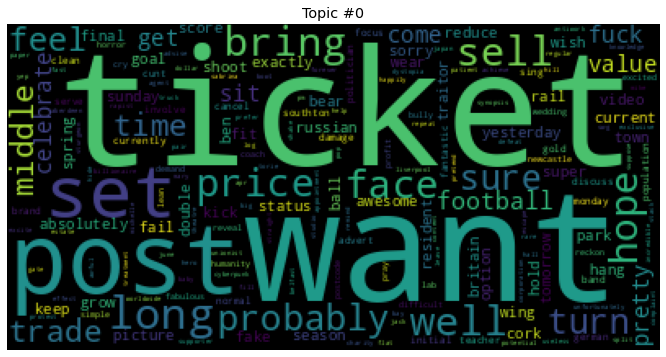

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


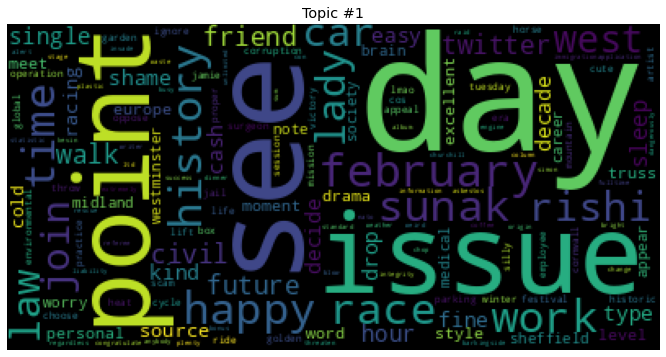

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


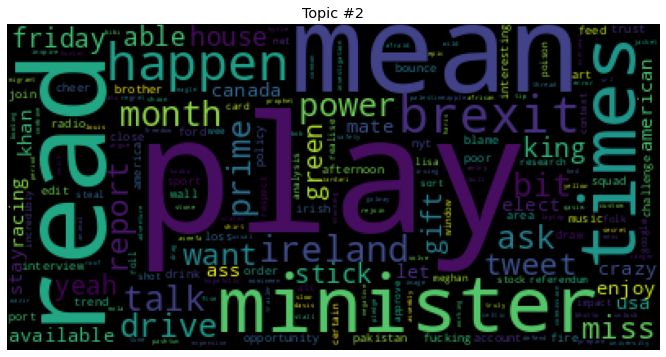

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


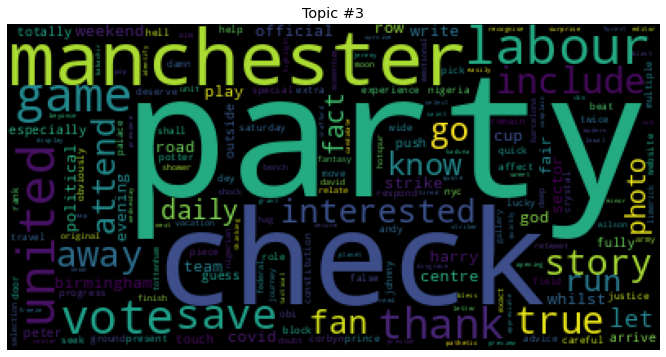

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


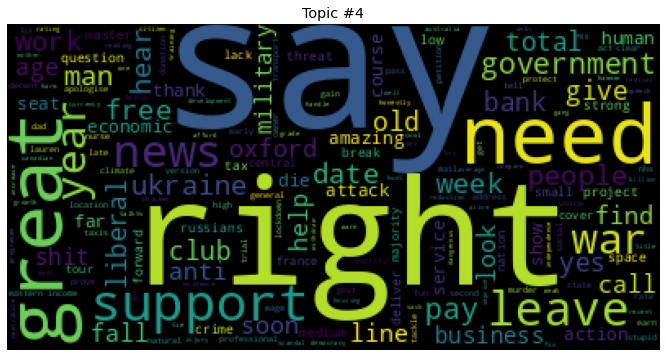

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


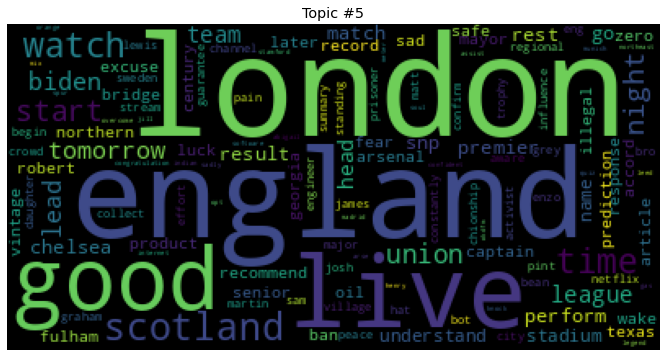

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


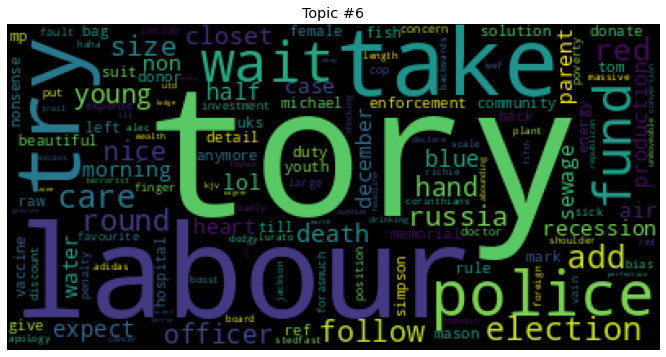

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


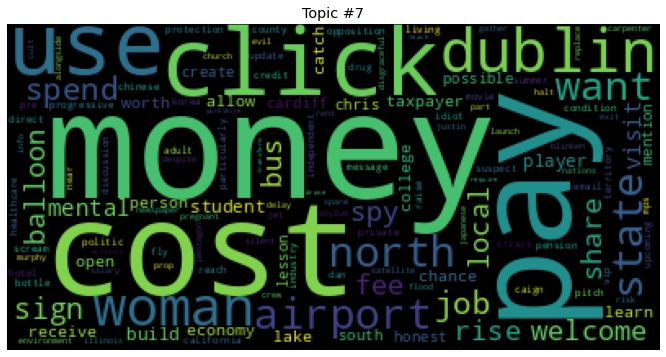

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


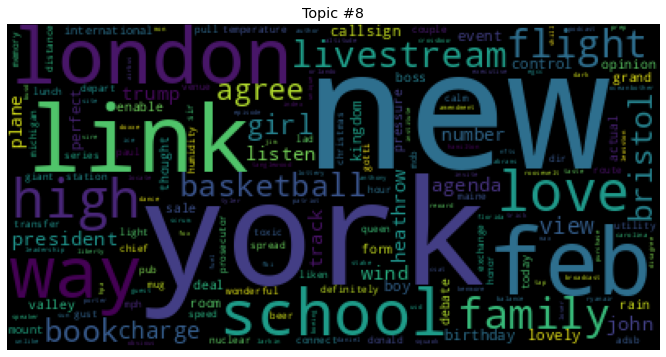

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


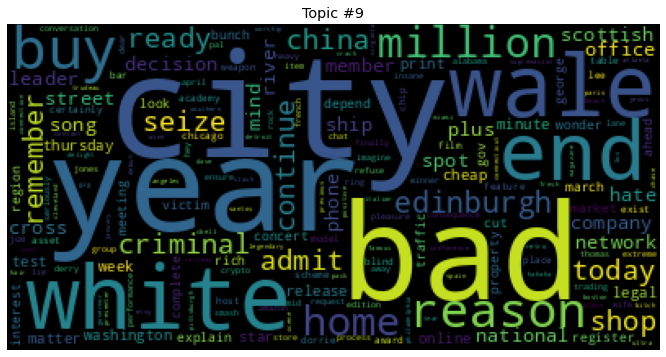

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


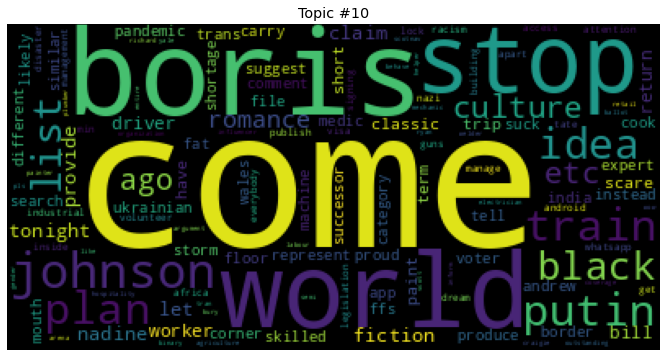

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


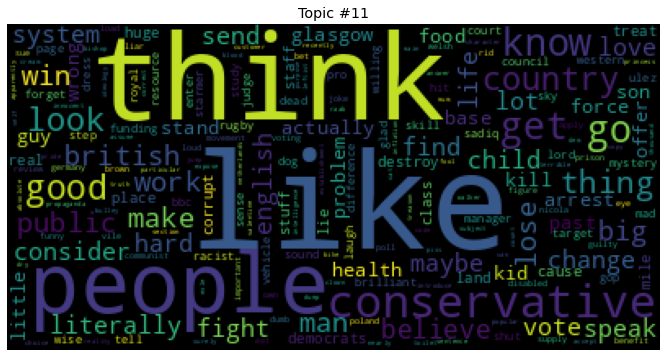

In [114]:
# !pip install wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

for t in range(best_lda_model.num_topics):
    
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(best_lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [68]:
sample_model =  gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


In [55]:
data = df.text.values.tolist()

def format_topics_sentences(texts=data,ldamodel=None,  corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                # topic_keywords = ", ".join([word for word, prop in wp])
                topic_keywords1 = ", ".join([word for word, prop in wp])
                topic_keywords = topic_keywords1.split(',')
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(texts=df.tokens,ldamodel=best_lda_model,  corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

<ipython-input-55-73f184736bf6>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-55-73f184736bf6>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             9.0              0.7204   
1            1             4.0              0.7605   
2            2             5.0              0.5070   
3            3             9.0              0.4778   
4            4            10.0              0.6176   
5            5             1.0              0.8733   
6            6            11.0              0.5903   
7            7             5.0              0.9241   
8            8            11.0              0.6949   
9            9             5.0              0.5514   

                                            Keywords  \
0  [day,  right,  want,  great,  leave,  take,  b...   
1  [good,  say,  know,  need,  support,  people, ...   
2  [london,  england,  live,  year,  scotland,  f...   
3  [day,  right,  want,  great,  leave,  take,  b...   
4  [world,  let,  stop,  liberal,  list,  black, ...   
5  [time,  look,  see,  news,  thing,  manchester...   
6  [think,  like,  get,  people,  conservative,  ...   
7  [london,  england,  live,  year,  scotland,  f...   
8  [think,  like,  get,  people,  conservative,  ...   
9  [london,  england,  live,  year,  scotland,  f...   

                                                Text  
0  [criterion, certainly, right, restoration, unl...  
1  [say, weather, balloon, deviate, course, say, ...  
2  [begin, understand, children, operational, sch...  
3  [excess, death, skyrocket, england, wale, deat...  
4  [scotland, seychelle, syria, south, africa, so...  
5  [horse, race, history, today, race, february, ...  
6  [ridiculous, service, store, remember, order, ...  
7  [chelsea, fulham, live, stream, premier, leagu...  
8                           [check, snake, eye, dvd]  
9  [jouvenel, sovereignty, fable, babylon, city, ...

In [56]:
df_dominant_topics=df_dominant_topic.copy()

In [57]:
df.tokens.isnull().sum()

0

In [58]:
df_dominant_topic['Keywords'].isnull().sum()
df_dominant_topic['Text'].isnull().sum()
df_dominant_topic.dropna()


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0               0             9.0              0.7204   
1               1             4.0              0.7605   
2               2             5.0              0.5070   
3               3             9.0              0.4778   
4               4            10.0              0.6176   
...           ...             ...                 ...   
9927         9927            11.0              0.4215   
9928         9928             0.0              0.3534   
9929         9929             1.0              0.2874   
9930         9930            11.0              0.7708   
9931         9931             3.0              0.7252   

                                               Keywords  \
0     [day,  right,  want,  great,  leave,  take,  b...   
1     [good,  say,  know,  need,  support,  people, ...   
2     [london,  england,  live,  year,  scotland,  f...   
3     [day,  right,  want,  great,  leave,  take,  b...   
4     [world,  let,  stop,  liberal,  list,  black, ...   
...                                                 ...   
9927  [think,  like,  get,  people,  conservative,  ...   
9928  [boris,  way,  big,  money,  wait,  johnson,  ...   
9929  [time,  look,  see,  news,  thing,  manchester...   
9930  [think,  like,  get,  people,  conservative,  ...   
9931  [new,  york,  work,  pay,  united,  make,  tim...   

                                                   Text  
0     [criterion, certainly, right, restoration, unl...  
1     [say, weather, balloon, deviate, course, say, ...  
2     [begin, understand, children, operational, sch...  
3     [excess, death, skyrocket, england, wale, deat...  
4     [scotland, seychelle, syria, south, africa, so...  
...                                                 ...  
9927     [great, afternoon, week, cardiff, worth, read]  
9928  [total, triage, phone, appointment, gps, offer...  
9929  [time, check, lauren, london, shake, ass, twit...  
9930                           [think, small, distance]  
9931  [imagine, experience, day, southern, caribbean...  

[9863 rows x 5 columns]

In [59]:
# def func(input_df):
#   intersect_topics_df = pd.DataFrame()
#   print(input_df,'\n ',type(input_df))
#   listA = input_df.iloc[3]
#   listB = input_df.iloc[4]
#   print(listA,'hello \n',listB)
#   common_elements = list(set(listA).intersection(set(listB)))
#   return {len(common_elements):common_elements}

# df_dominant_topic['new']=df_dominant_topic[['Keywords','Text']].apply(func)
# df_dominant_topic.head(10)

intersect_topics_df = pd.DataFrame()
for i,row in df_dominant_topic.iterrows():
  listA = row.Keywords
  # print('listA',listA)
  listB = row.Text
  # print('listB',listB)
  try:
    common_elements = list(set(listA).intersection(set(listB)))
    len_intersect= len(common_elements)
    intersect_topics_df =intersect_topics_df.append(pd.Series([int(row.Document_No), int(len_intersect),  common_elements]), ignore_index=True)
  except Exception as e:
    None
    # print("Error ",e," for ",row)
intersect_topics_df.columns = ['DocId', 'Number_of_common_words', 'Common_words']



<ipython-input-59-775dc3ca547e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intersect_topics_df =intersect_topics_df.append(pd.Series([int(row.Document_No), int(len_intersect),  common_elements]), ignore_index=True)
<ipython-input-59-775dc3ca547e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intersect_topics_df =intersect_topics_df.append(pd.Series([int(row.Document_No), int(len_intersect),  common_elements]), ignore_index=True)


In [60]:
intersect_topics_df.head(20)

intersect_topics_df.groupby(['Number_of_common_words']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

Number_of_common_words  counts
0                       0    9385
1                       1     478

not a good scenario

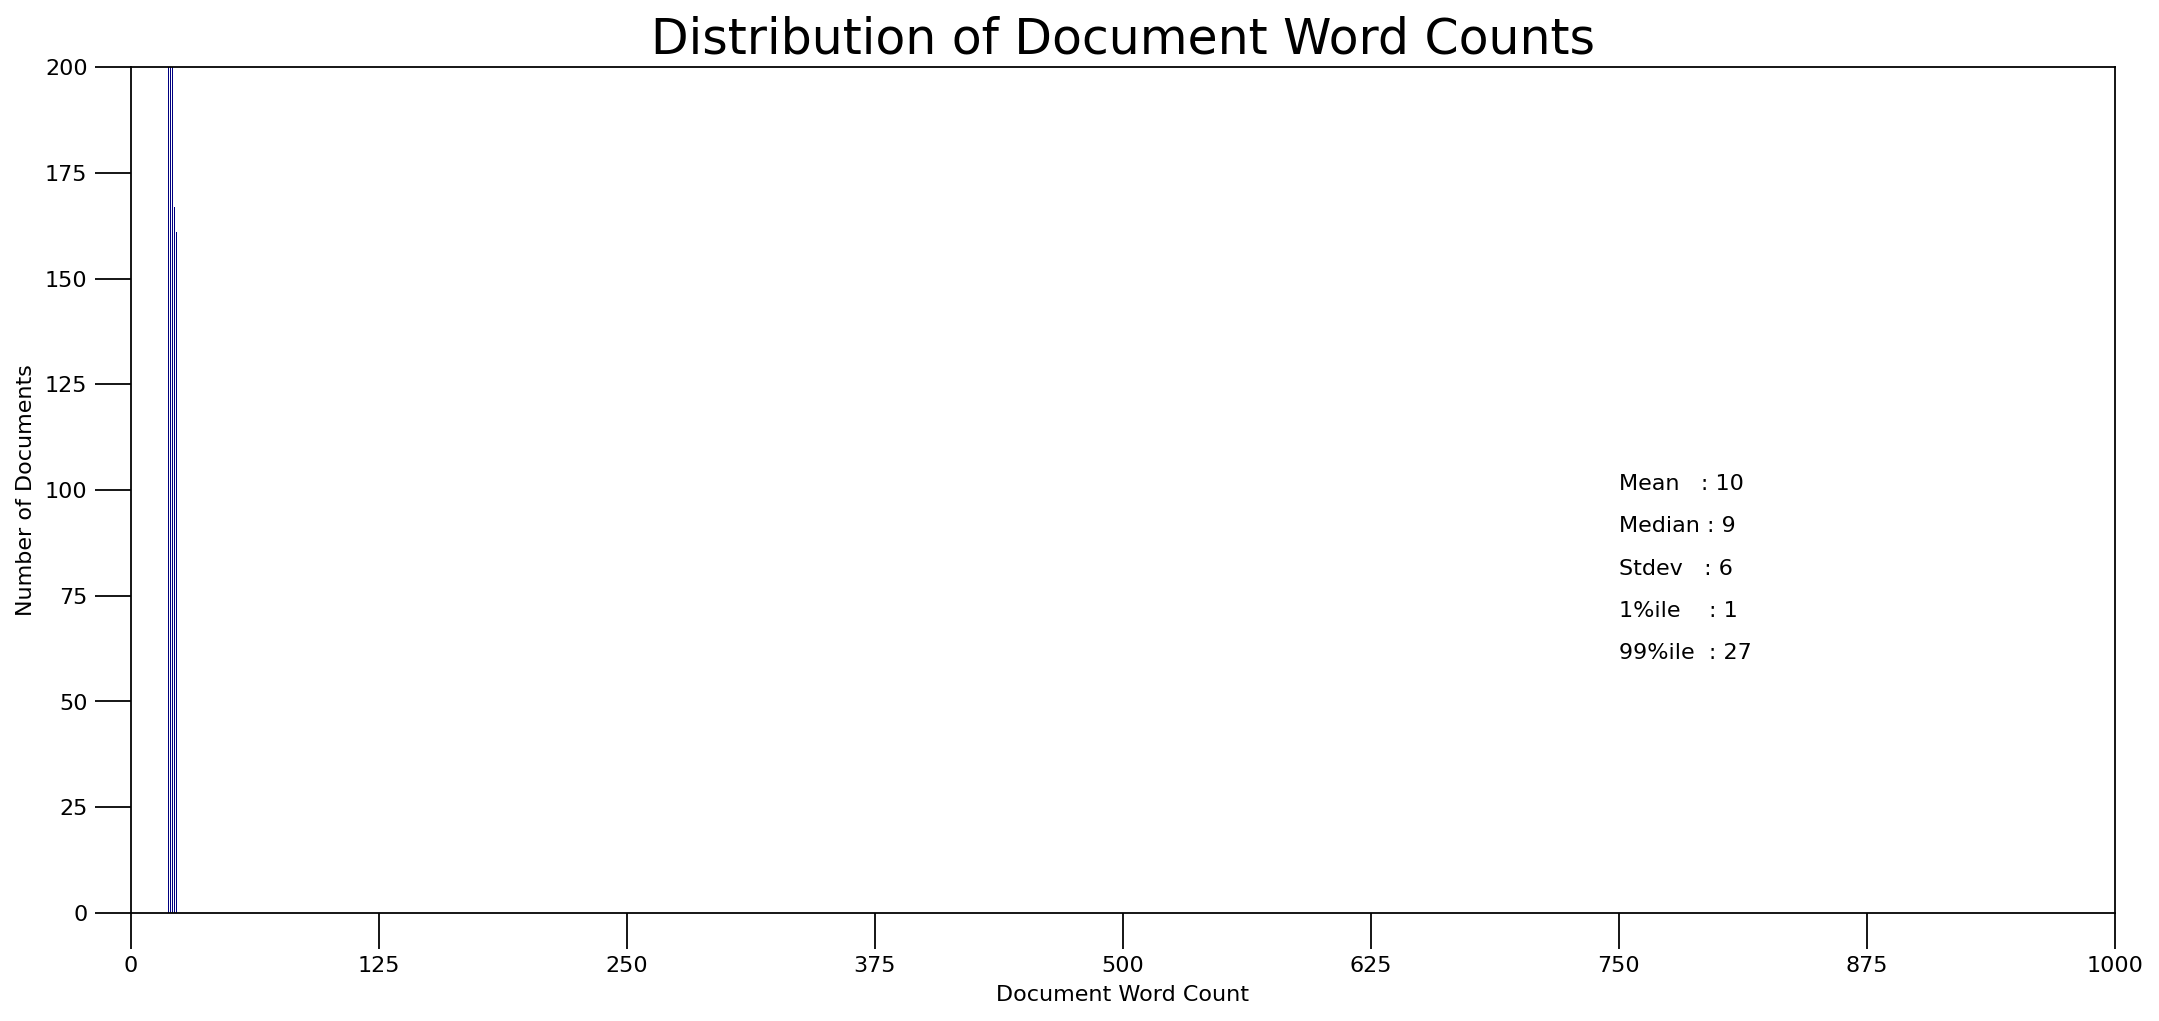

In [61]:
# doc_lens = [len(d) for d in df_dominant_topic.Text]
doc_lens = []
for d in df_dominant_topic.Text:
  try:
    doc_lens.append(len(d))
  except:
    None 
# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000),ylim=(0, 200), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

<ipython-input-62-6087274383ca>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-62-6087274383ca>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-62-6087274383ca>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-62-6087274383ca>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

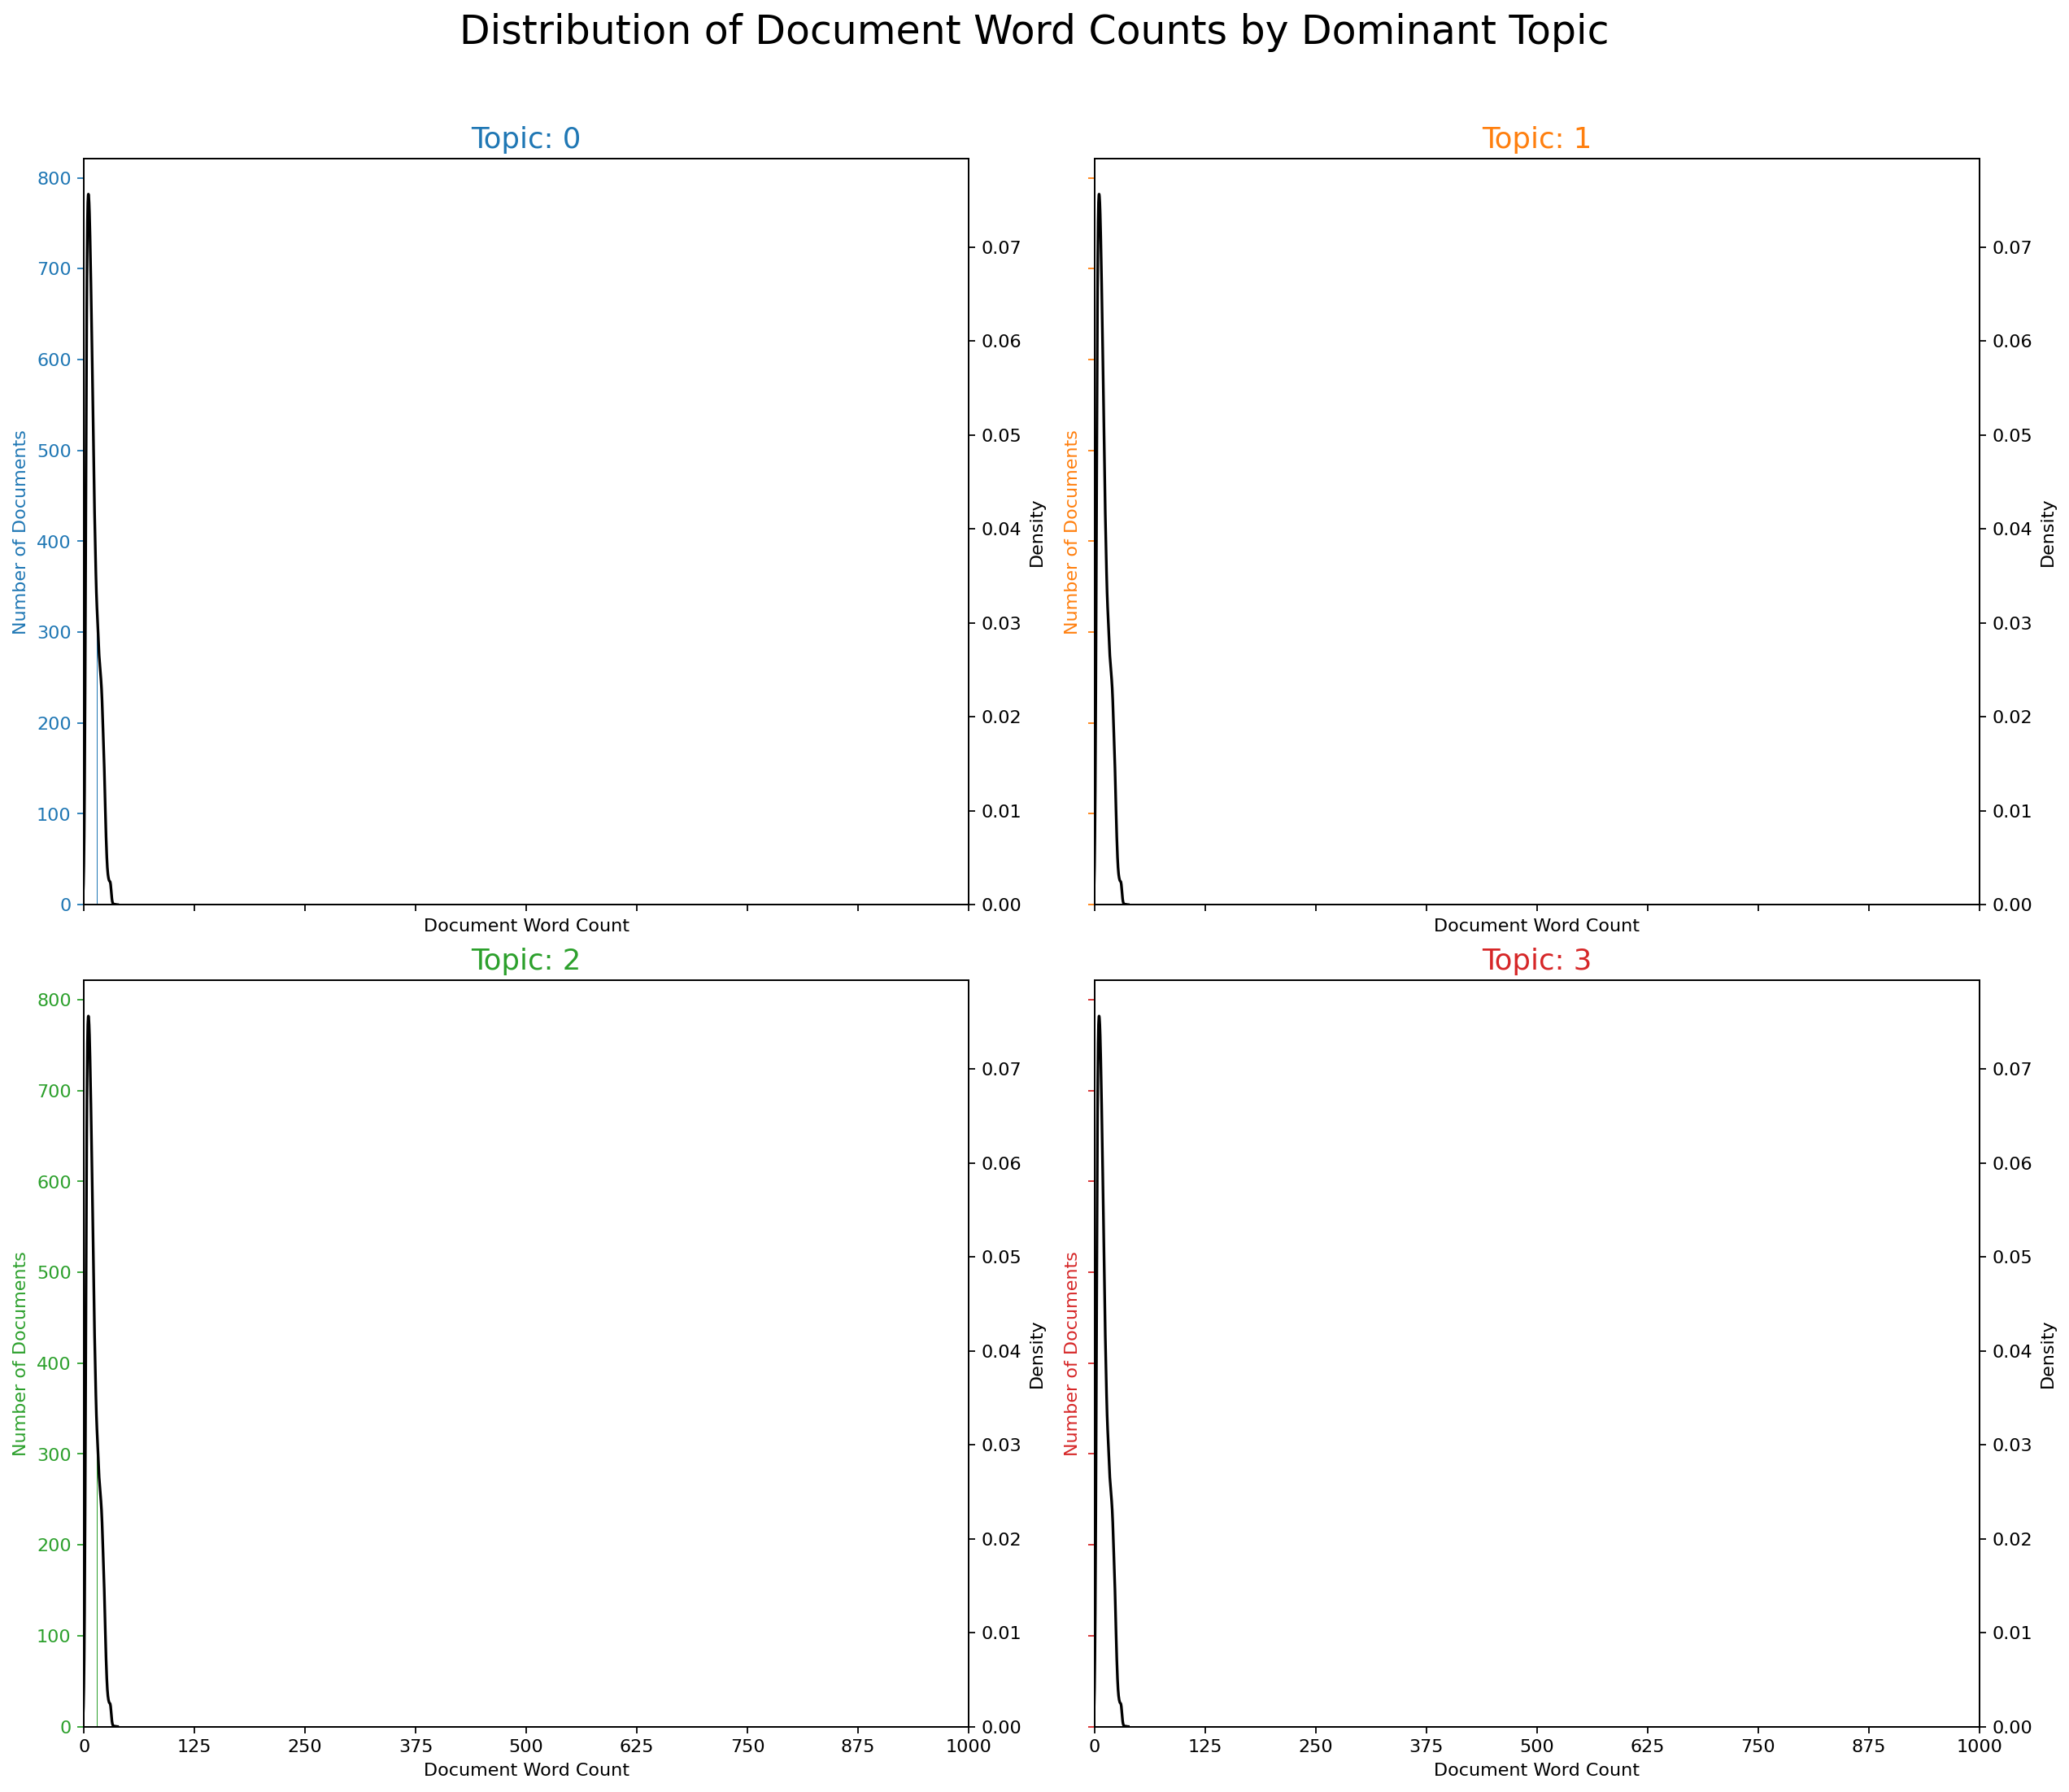

In [62]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    # doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [124]:
# !pip install wordcloud
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = model.show_topics(formatted=False) ## need to change the "Ida_model" to"model", because "Ida_model"is not defined before.

# fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

<ipython-input-51-74cc5b0e2776>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_new.loc[df_new.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


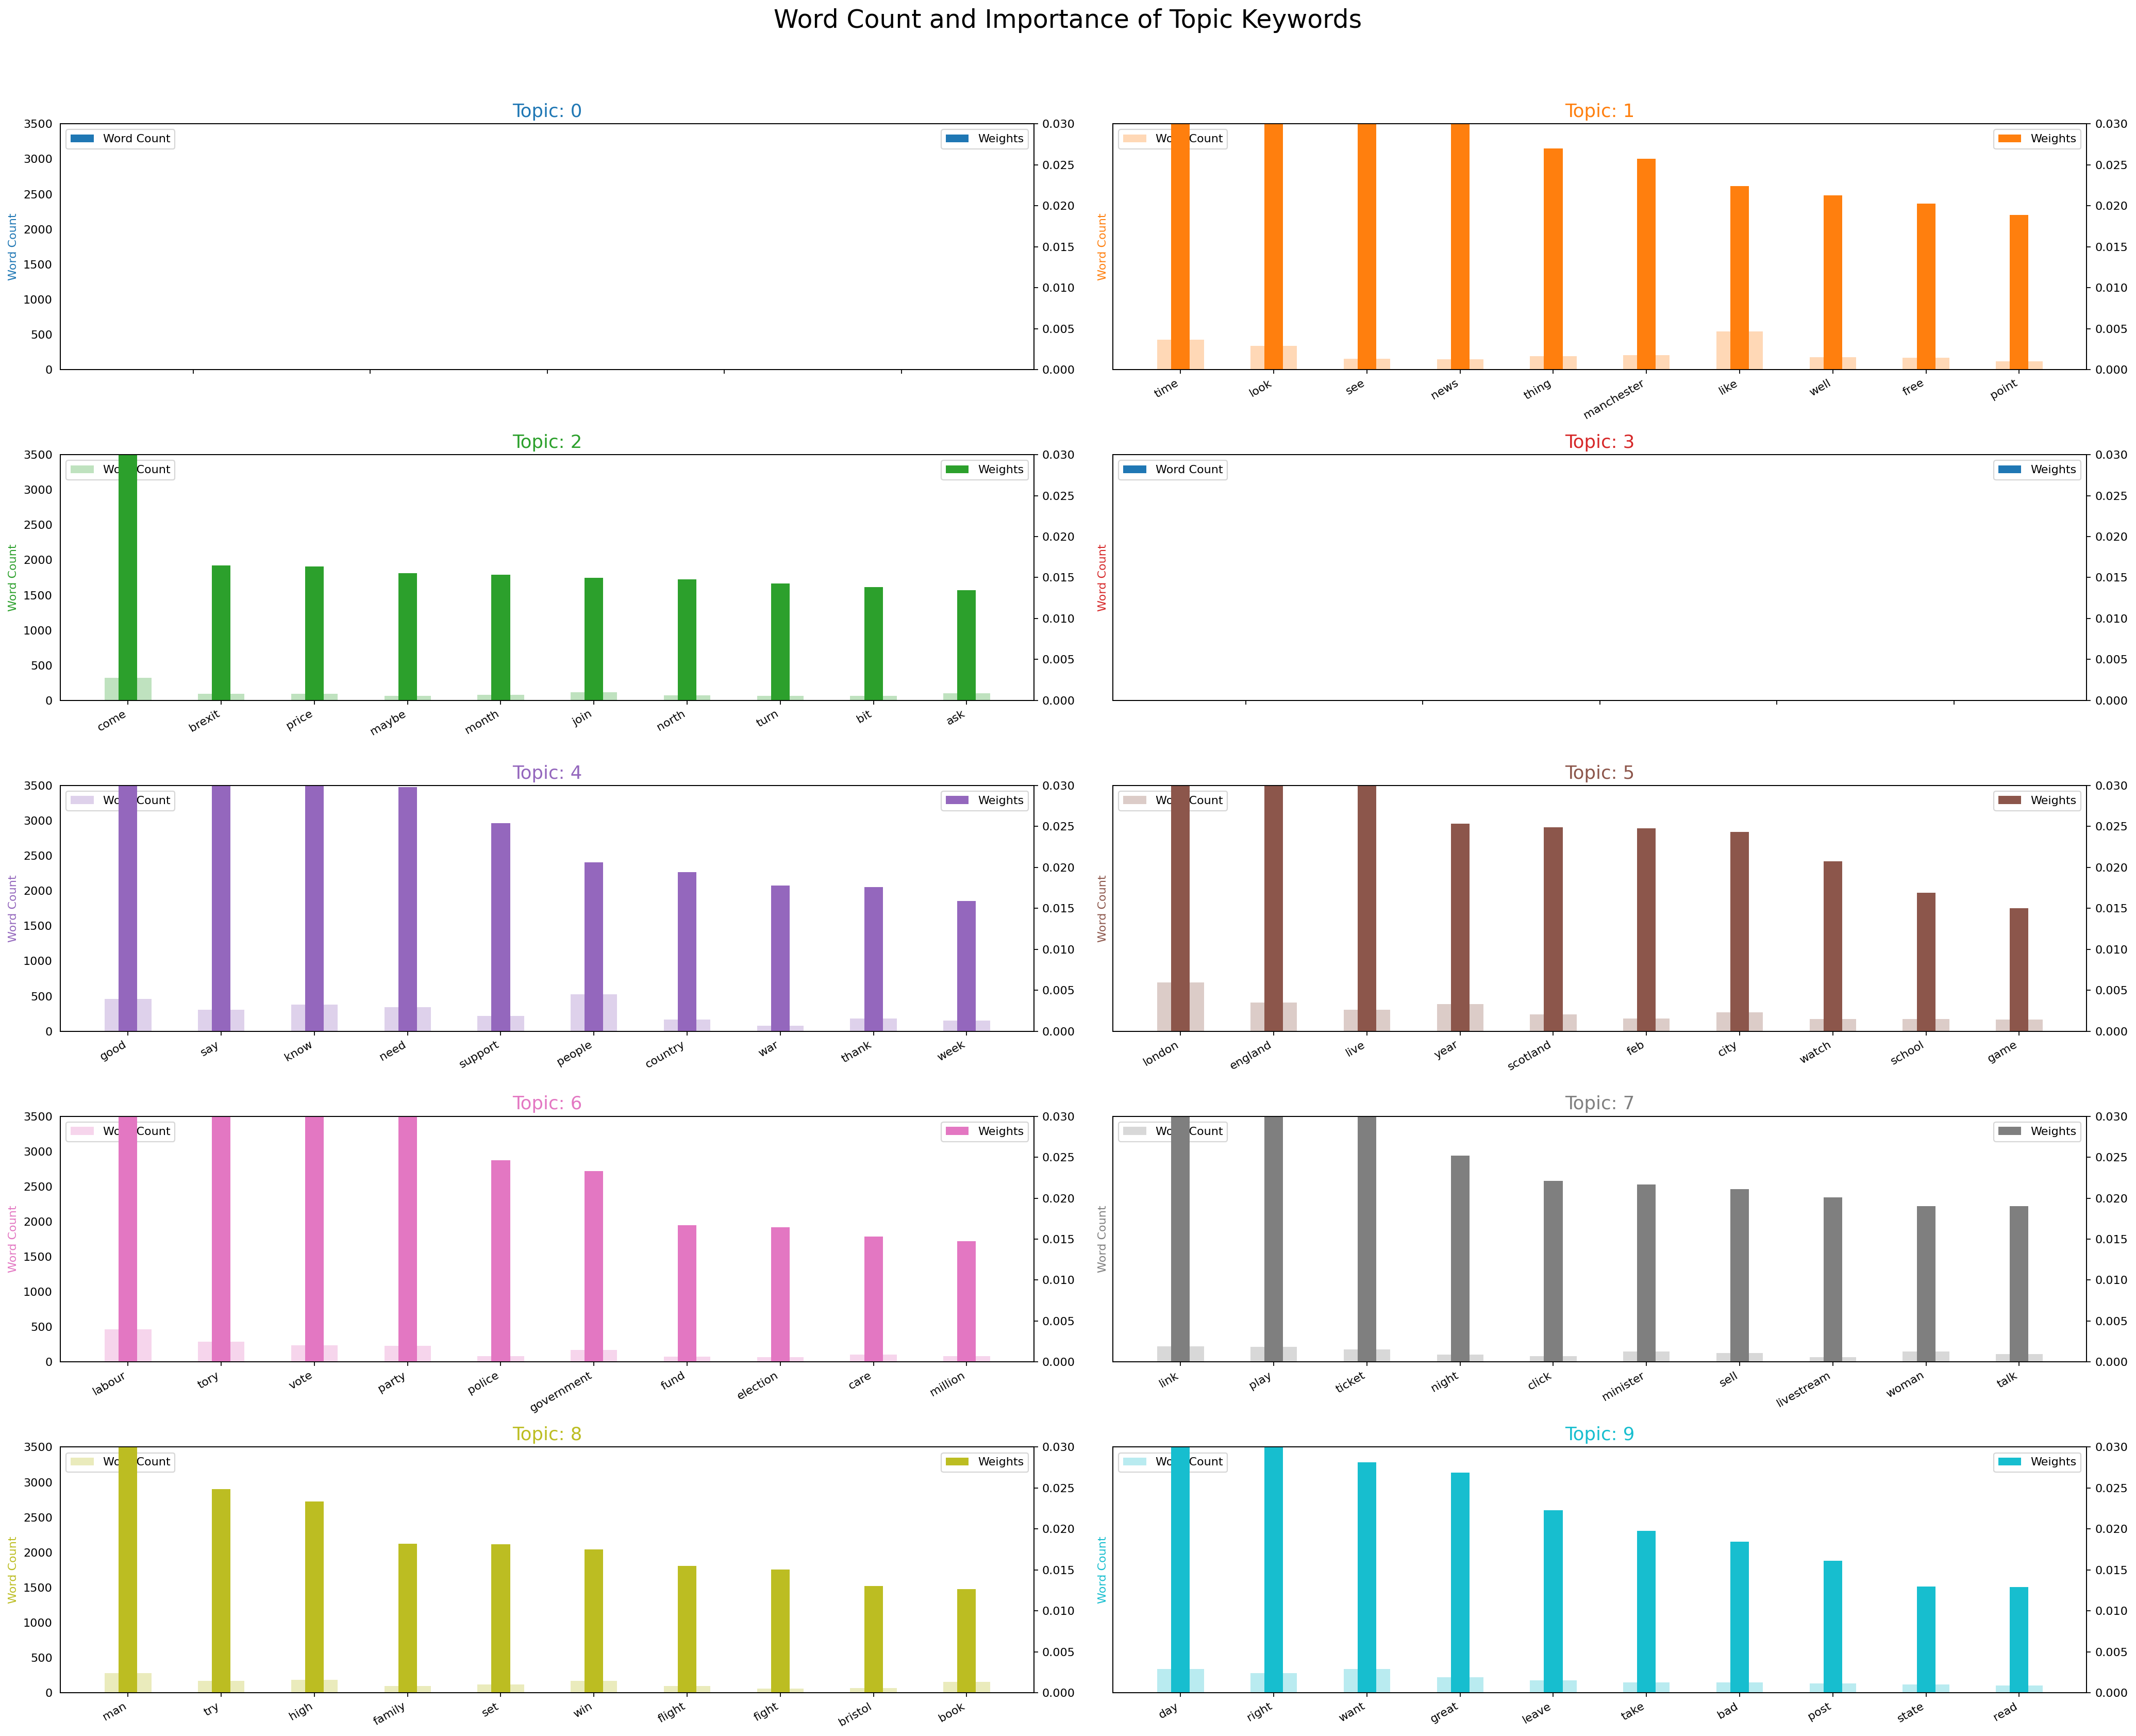

In [51]:
from collections import Counter
topics = best_lda_model.show_topics(formatted=False)

# data_flat = [w for w_list in data_ready for w in w_list]
data_flat=[]
for i,row1 in df.iterrows():
  for j in row1.tokens:
    data_flat.append(j)
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_new = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(26,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_new.loc[df_new.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_new.loc[df_new.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_new.loc[df_new.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [148]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3


In [72]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=sample_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            print(lda_model[corp_cur])
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [65]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=best_lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df_new2 = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df_new2.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in best_lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [71]:
# !pip install --upgrade pip
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(best_lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 12
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7168 samples in 0.009s...
[t-SNE] Computed neighbors for 7168 samples in 0.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7168
[t-SNE] Computed conditional probabilities for sample 2000 / 7168
[t-SNE] Computed conditional probabilities for sample 3000 / 7168
[t-SNE] Computed conditional probabilities for sample 4000 / 7168
[t-SNE] Computed conditional probabilities for sample 5000 / 7168
[t-SNE] Computed conditional probabilities for sample 6000 / 7168
[t-SNE] Computed conditional probabilities for sample 7000 / 7168
[t-SNE] Computed conditional probabilities for sample 7168 / 7168
[t-SNE] Mean sigma: 0.000002
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.440910
[t-SNE] KL divergence after 1000 iterations: 0.722571


In [ ]:
# def symmetric_kl_divergence(p, q):
#     """ Caluculates symmetric Kullback-Leibler divergence.
#     """
#     return np.sum([stats.entropy(p, q), stats.entropy(q, p)])



---





---



**Grouped Tweets**

In [147]:
df_grouped1 = pd.read_csv('/content/groupedTweets.csv')
df_grouped_text2 =df_grouped1.groupby(['group'], as_index = False).agg({'text': ' '.join})
df_grouped_text2

group                                               text
0        0  @pansexualflower Criterion certainly have US r...
1        1  🇨🇳 🇺🇸 #China\n#Chinese #Foreign #Ministry said...
2        2  “As they began to understand the children’s op...
3        3  Excess Deaths Skyrocket Again In England And W...
4        4  @altgirlalterego scotland, seychelles, syria, ...
..     ...                                                ...
466    466  @whiskytip @TheWhiskyNovice @BimberLondon Very...
467    467  So this means that in 2026 there'll be Ford vs...
468    468  Should be no fucking split about it. Terminate...
469    469  How is Graham Potter starting havertz over Aub...
470    470  @WhenIsBirths In an arrangement by Michael Jac...

[471 rows x 2 columns]

In [111]:
# df_grouped = 


df_grouped = pd.read_csv('/content/groupedTweets.csv')
print(df_grouped.shape) 
column_tweets = df_grouped.columns
df_grouped.describe()

(9968, 6)


group       tweetID       qScore       nScore
count  9968.000000  9.968000e+03  9968.000000  9968.000000
mean     85.552769  1.621603e+18     0.596870     0.608089
std      92.975854  1.578024e+12     0.055180     1.732554
min       0.000000  1.621601e+18     0.374306    -7.033362
25%      16.000000  1.621602e+18     0.571552     0.000000
50%      48.000000  1.621603e+18     0.607887     0.079807
75%     119.000000  1.621605e+18     0.609435     1.870719
max     470.000000  1.621606e+18     0.820619     5.259908

In [112]:
df_grouped.head()

group              tweetID        username  \
0      0  1621600585291014145   realJackEason   
1      0  1621600597127331842          battez   
2      0  1621600609030782981    Reno_station   
3      0  1621600638256693252     pedrinho_uk   
4      0  1621600792812609541  ClimateSchmidt   

                                                text    qScore    nScore  
0  @pansexualflower Criterion certainly have US r...  0.613271  2.934114  
1  @StratAnalytica @EconguyRosie yeah I'm in UK j...  0.603617  1.712620  
2  @NappaBald66 Dry clean eraser should do the tr...  0.669598  3.165340  
3  @alanvibe @DrHoenderkamp @haringeycouncil @mik...  0.543737  3.485828  
4  @PGDynes Climate change is a real problem, but...  0.609599  1.870719

inital stats

[['criterion', 'certainly', 'have', 'us', 'rights', 'to', 'the', 'restoration', 'but', 'very', 'unlikely', 'they', 'have', 'any', 'claim', 'to', 'uk', 'uhd', 'rights', 'alone', 'this', 'seems', 'more', 'like', 'cost', 'analysis', 'decision', 'by', 'the', 'bfi', 'or', 'else', 'they', 'determined', 'the', 'new', 'restoration', 'doesnt', 'merit', 'for', 'home', 'release', 'which', 'would', 'be', 'odd']]
221082 words total without text processing , with a vocabulary size of 27273
Max tweet length is 58
average tweet length is 22.179173354735152


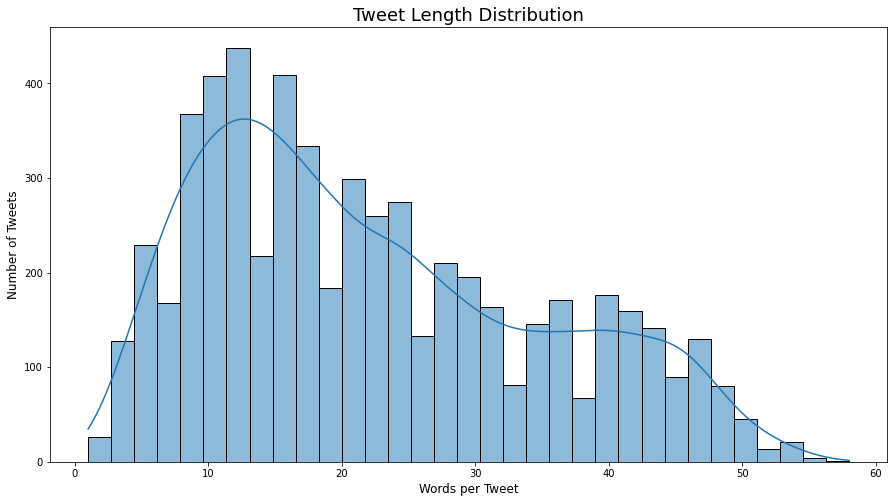

In [113]:
data_gr_initial = df_grouped.text.values.tolist()
data_words_initial_gr = list(sent_to_words(data_gr_initial))
print(data_words_initial_gr[:1])

all_words_initial_gr = [word for tokens in data_words_initial_gr for word in tokens]
tweet_lengths_inital_gr = [len(tokens) for tokens in data_words_initial_gr]
vocab_inital_gr = sorted(list(set(all_words_initial_gr)))

print('{} words total without text processing , with a vocabulary size of {}'.format(len(all_words_initial_gr), len(vocab_inital_gr)))
print('Max tweet length is {}'.format(max(tweet_lengths_inital_gr)))
print('average tweet length is {}'.format(len(all_words_initial_gr)/len(tweet_lengths_inital_gr)))

plot_word_distribution(tweet_lengths_inital_gr)

Group By Text:

In [114]:
df_grouped.groupby(['group']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

group  counts
15     15     932
14     14     402
3       3     380
22     22     306
26     26     280
23     23     234
46     46     230
81     81     226
33     33     215
74     74     175

In [115]:
df_grouped_text =df_grouped.groupby(['group'], as_index = False).agg({'text': ' '.join})
df_grouped_text

group                                               text
0        0  @pansexualflower Criterion certainly have US r...
1        1  🇨🇳 🇺🇸 #China\n#Chinese #Foreign #Ministry said...
2        2  “As they began to understand the children’s op...
3        3  Excess Deaths Skyrocket Again In England And W...
4        4  @altgirlalterego scotland, seychelles, syria, ...
..     ...                                                ...
466    466  @whiskytip @TheWhiskyNovice @BimberLondon Very...
467    467  So this means that in 2026 there'll be Ford vs...
468    468  Should be no fucking split about it. Terminate...
469    469  How is Graham Potter starting havertz over Aub...
470    470  @WhenIsBirths In an arrangement by Michael Jac...

[471 rows x 2 columns]

In [116]:
data_gr_initial = df_grouped_text.text.values.tolist()
data_words_initial_gr = list(sent_to_words(data_gr_initial))
print(data_words_initial_gr[:1])

all_words_initial_gr = [word for tokens in data_words_initial_gr for word in tokens]
tweet_lengths_inital_gr = [len(tokens) for tokens in data_words_initial_gr]
vocab_inital_gr = sorted(list(set(all_words_initial_gr)))

print('{} words total without text processing , with a vocabulary size of {}'.format(len(all_words_initial_gr), len(vocab_inital_gr)))
print('Max tweet length is {}'.format(max(tweet_lengths_inital_gr)))
print('average tweet length is {}'.format(len(all_words_initial_gr)/len(tweet_lengths_inital_gr)))


# plot_word_distribution(tweet_lengths_inital_gr)

[['criterion', 'certainly', 'have', 'us', 'rights', 'to', 'the', 'restoration', 'but', 'very', 'unlikely', 'they', 'have', 'any', 'claim', 'to', 'uk', 'uhd', 'rights', 'alone', 'this', 'seems', 'more', 'like', 'cost', 'analysis', 'decision', 'by', 'the', 'bfi', 'or', 'else', 'they', 'determined', 'the', 'new', 'restoration', 'doesnt', 'merit', 'for', 'home', 'release', 'which', 'would', 'be', 'odd', 'yeah', 'im', 'in', 'uk', 'just', 'realised', 'this', 'context', 'and', 'it', 'all', 'seems', 'bit', 'sus', 'now', 'maybe', 'an', 'accounting', 'fudge', 'from', 'prev', 'month', 'to', 'create', 'this', 'month', 'hopefully', 'someone', 'qualified', 'will', 'look', 'into', 'it', 'dry', 'clean', 'eraser', 'should', 'do', 'the', 'trick', 'as', 'doesnt', 'look', 'to', 'bad', 'crumbly', 'for', 'heavier', 'stains', 'jean', 'bleed', 'etc', 'pal', 'in', 'my', 'area', 'emergency', 'services', 'amp', 'thames', 'water', 'had', 'problems', 'accessing', 'roads', 'because', 'or', 'roadblock', 'ltn', 'seem

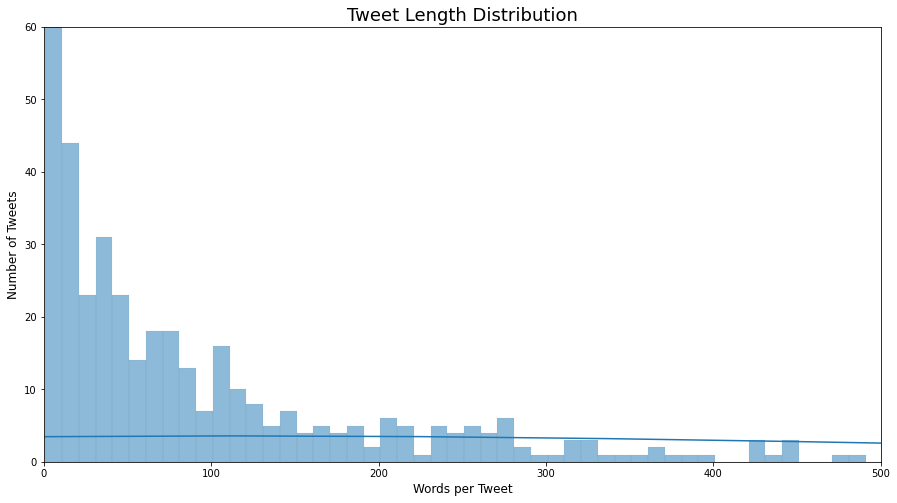

In [117]:
plt.figure(figsize = (15,8))
sns.histplot(tweet_lengths_inital_gr,stat='count',binwidth=10,kde=True)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlim(0, 500)
plt.ylim(0, 60)
plt.show()


Text preprocessing

In [118]:
df_grouped_text.text=df_grouped_text.text.apply(remove_urls)
df_grouped_text.text=df_grouped_text.text.apply(to_lowercase)
df_grouped_text.text=df_grouped_text.text.apply(expand_contractions)
df_grouped_text.text=df_grouped_text.text.apply(standardize_accented_chars)
df_grouped_text.text=df_grouped_text.text.apply(remove_mentions_and_tags)
df_grouped_text.text=df_grouped_text.text.apply(keep_only_alphabet)
df_grouped_text.text=df_grouped_text.text.apply(remove_amp)

In [119]:
df_grouped_text.text=df_grouped_text.text.apply(lambda x:remove_stopwords(x,nlp))
df_grouped_text.text=df_grouped_text.text.apply(lambda x:lemmatize(x,nlp))
df_grouped_text['tokens'] = df_grouped_text.text.apply(generate_tokens)


all_words_final = [word for tokens in df_grouped_text['tokens'] for word in tokens]
tweet_lengths_final = [len(tokens) for tokens in df_grouped_text['tokens']]
vocab_final = sorted(list(set(all_words_final)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words_final), len(vocab_final)))
print('Max tweet length is {}'.format(len(tweet_lengths_final)))
print('average tweet length is {}'.format(len(all_words_final)/len(tweet_lengths_final)))


# plt.figure(figsize = (15,8))
# sns.histplot(tweet_lengths_final,stat='frequency',kde=True)
# plt.title('Tweet Length Distribution', fontsize = 18)
# plt.xlabel('Words per Tweet', fontsize = 12)
# plt.ylabel('Number of Tweets', fontsize = 12)
# plt.show()



102698 words total, with a vocabulary size of 15616
Max tweet length is 471
average tweet length is 218.04246284501062


In [120]:
data_words_grouped=list(df_grouped_text.tokens)
bigram = gensim.models.Phrases(data_words_grouped, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams_grouped = make_bigrams(data_words_grouped)


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_grouped = lemmatization(data_words_bigrams_grouped, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])



In [121]:
id2word_grouped=create_dictionary(data_lemmatized_grouped)
corpus_grouped=create_document_matrix(df_grouped_text.tokens,id2word_grouped)

In [135]:
model_list_gr, coherence_values_gr,perplexity_score_gr = compute_coh_per_values(dictionary=id2word_grouped, corpus=corpus_grouped,texts=df_grouped_text.tokens , start=2, limit=20, step=3)


Type: Mallet | Topics: 2


/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1134: RuntimeWarning: invalid value encountered in multiply
  formatted : bool, optional
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1135: RuntimeWarning: invalid value encountered in subtract
  Whether the topic representations should be formatted as strings. If False, they are returned as


scores are  nan   0.30811317697983015
Type: Mallet | Topics: 5
scores are  nan   0.35098024102470815
Type: Mallet | Topics: 8
scores are  nan   0.36629883506060545
Type: Mallet | Topics: 11
scores are  nan   0.37084451421727044
Type: Mallet | Topics: 14
scores are  nan   0.3373838819632997
Type: Mallet | Topics: 17
scores are  nan   0.3464699102971354


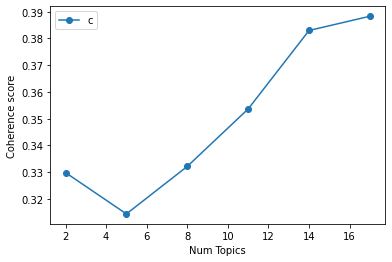

In [117]:
# Results for bigram grouped model (Do not run the cell to avoid overriding)

limit=20; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values_gr,marker='o')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



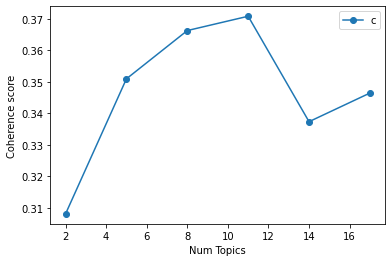

In [136]:
limit=20; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values_gr,marker='o')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [118]:
# Results for bigram grouped model (Do not run the cell to avoid overriding)
coh_list_n=[x,coherence_values_gr]
df_coh_n = pd.DataFrame (coh_list_n).transpose()
df_coh_n.columns = ['K', 'Coherence Score']
print (df_coh_n)


      K  Coherence Score
0   2.0         0.329864
1   5.0         0.314430
2   8.0         0.332189
3  11.0         0.353646
4  14.0         0.382968
5  17.0         0.388291


In [137]:
coh_list_n=[x,coherence_values_gr]
df_coh_n = pd.DataFrame (coh_list_n).transpose()
df_coh_n.columns = ['K', 'Coherence Score']
print (df_coh_n)

      K  Coherence Score
0   2.0         0.308113
1   5.0         0.350980
2   8.0         0.366299
3  11.0         0.370845
4  14.0         0.337384
5  17.0         0.346470


In [165]:
model_list2_gr,perplexity_scores_lda_gr = compute_coh_per_values2(dictionary=id2word_grouped, corpus=corpus_grouped,texts=df_grouped_text.tokens , start=2, limit=20, step=3)



Type: LDA | Topics: 2
scores are  -8.143798954451897
Type: LDA | Topics: 5
scores are  -8.137561256391333
Type: LDA | Topics: 8
scores are  -8.14172281851396
Type: LDA | Topics: 11
scores are  -8.32124232223668
Type: LDA | Topics: 14
scores are  -8.54480259853601
Type: LDA | Topics: 17
scores are  -8.692711766830902


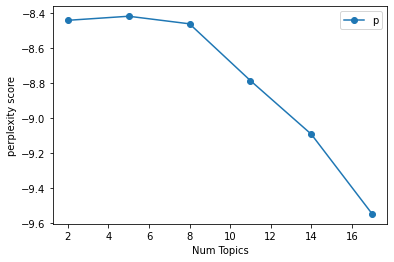

In [139]:
limit=20; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, perplexity_scores_lda_gr,marker='o')
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_score"), loc='best')
plt.show()

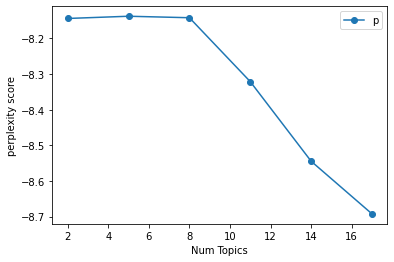

In [122]:
# Results for bigram grouped model (Do not run the cell to avoid overriding)

limit=20; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, perplexity_scores_lda_gr,marker='o')
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_score"), loc='best')
plt.show()

In [123]:
# Results for bigram grouped model (Do not run the cell to avoid overriding)

plx_list_n=[x,perplexity_scores_lda_gr]
df_plx_n = pd.DataFrame (plx_list_n).transpose()
df_plx_n.columns = ['K', 'Perplexity Score']
print (df_plx_n)


      K  Perplexity Score
0   2.0         -8.143799
1   5.0         -8.137561
2   8.0         -8.141723
3  11.0         -8.321242
4  14.0         -8.544803
5  17.0         -8.692712


In [140]:
plx_list_n=[x,perplexity_scores_lda_gr]
df_plx_n = pd.DataFrame (plx_list_n).transpose()
df_plx_n.columns = ['K', 'Perplexity Score']
print (df_plx_n)


      K  Perplexity Score
0   2.0         -8.441078
1   5.0         -8.417815
2   8.0         -8.461171
3  11.0         -8.785532
4  14.0         -9.091625
5  17.0         -9.547052


In [171]:
best_grouped_model =model_list2_gr[8]

In [172]:
get_lda_topics(best_grouped_model,8,10)


Topic # 01 Topic # 02   Topic # 03 Topic # 04  Topic # 05  Topic # 06  \
0         wake       pull      cardiff    portman     visitor      relate   
1     southton   previous         path  moderator      action       admin   
2         path  countless        treat  synthetic  domination      couple   
3        tress    airport      instead      korea   political  corruption   
4     unskille  blueprint         copy        run         obi  foundation   
5       dought      crime         dose     tosser      stupid        pull   
6     debuting     kaftan     consider      handy     roberts   awareness   
7  educational      treat        tanto      joyce        copy     failing   
8    muscovian       shop        kanye   magazine       turbo        xtra   
9      wording        sad  heavyweight    enquiry        maga     hashtag   

  Topic # 07 Topic # 08  
0       till       dens  
1        vip       take  
2       tory       grim  
3     accept    premier  
4    analyst     london  
5    cholera        pre  
6       copy     sandie  
7      catch      prime  
8     screen        ltn  
9     income    hashtag

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


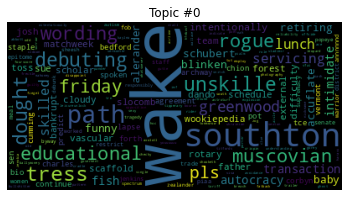

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


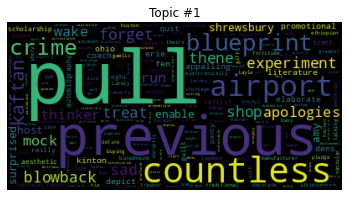

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


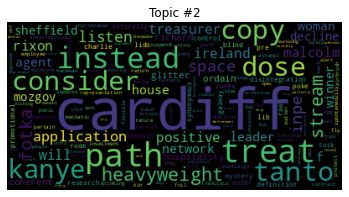

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


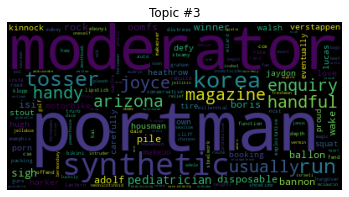

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


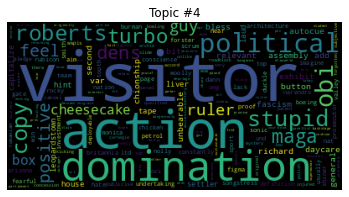

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


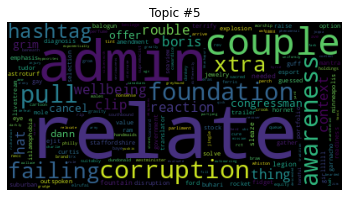

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


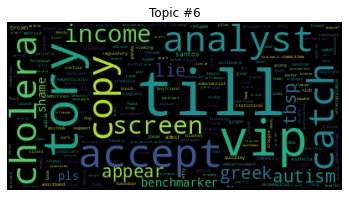

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


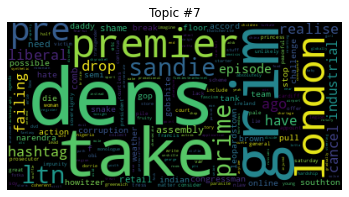

In [173]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

for t in range(best_grouped_model.num_topics):
    
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(best_grouped_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()



---



In [162]:
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = best_grouped_model.show_topics(formatted=False) ## need to change the "Ida_model" to"model", because "Ida_model"is not defined before.

# fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

bigrasm + trigram model

In [178]:
best_grouped_model2 =model_list2_gr[2]

In [188]:
len(data_lemmatized_grouped[0])

351

In [122]:
import gensim
from gensim.models.phrases import Phrases, Phraser

# Get the 'tokens' column as a list of lists
tokens_lists = df_grouped_text['tokens'].tolist()

# Create bigram and trigram models
bigram = Phraser(Phrases(tokens_lists, min_count=5, threshold=100))
trigram = Phraser(Phrases(bigram[tokens_lists], min_count=5, threshold=100))

# Tokenize the text data with bigrams and trigrams
tokenized_lists = []
for tokens in tokens_lists:
    bigram_tokens = bigram[tokens]
    trigram_tokens = trigram[tokens]
    tokenized_lists.append(trigram_tokens)
# Update the 'tokens' column with the tokenized lists
df_grouped_text['tokens_with_bigrams'] = tokenized_lists


In [123]:
def create_dictionary(words):
    return corpora.Dictionary(words)
    
def create_document_matrix(tokens,id2word):
  corpus = []

  for text in tokens:
      corpus.append(id2word.doc2bow(text))
  return corpus

id2word_grouped_bigrms=create_dictionary(df_grouped_text['tokens_with_bigrams'])
corpus_grouped_bigrms=create_document_matrix(df_grouped_text['tokens_with_bigrams'],id2word_grouped_bigrms)

In [124]:
group_lda = gensim.models.ldamodel.LdaModel(corpus=corpus_grouped_bigrms,
                                           id2word=id2word_grouped_bigrms,
                                           num_topics=4, 
                                           random_state=100,
                                           chunksize=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='symmetric',
                                           eta='symmetric',
                                           per_word_topics=True)


In [125]:
get_lda_topics(group_lda,4,10)

Topic # 01        Topic # 02 Topic # 03         Topic # 04
0          like               new       good             london
1        people              york       time            england
2        labour               feb        get  manchester_united
3          tory              city        day                set
4          need      conservative         go          long_bear
5  conservative       high_school     london         serve_rest
6          vote        livestream       come       humanity_tom
7          know           england       year       horror_story
8         right         link_date    england       dystopia_man
9         party  basketball_click      great        escape_live

In [217]:
data_words_bi=list(df_grouped_text.tokens_with_bigrams)

perplexity_gram=group_lda.log_perplexity(corpus_grouped_bigrms);
coherence__gram = CoherenceModel(model=group_lda, texts=data_words_bi, dictionary=id2word_grouped_bigrms, coherence='c_v').get_coherence()


In [218]:
print(perplexity_gram)
print(coherence__gram)

-8.510769501123612
0.4141497189403112


In [215]:
pyldavis_show(group_lda,corpus_grouped_bigrms,id2word_grouped_bigrms)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.120822 -0.063701       1        1  48.077621
0     -0.093752  0.097548       2        1  31.961916
1      0.060558 -0.105726       3        1  14.318787
3      0.154016  0.071878       4        1   5.641676, topic_info=                Term        Freq       Total Category  logprob  loglift
184              new  663.000000  663.000000  Default  30.0000  30.0000
316             york  450.000000  450.000000  Default  29.0000  29.0000
690           london  375.000000  375.000000  Default  28.0000  28.0000
673           labour  319.000000  319.000000  Default  27.0000  27.0000
155             like  364.000000  364.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
1511            hell    9.676688   31.607931   Topic4  -6.3628   1.6913
760   premier_league    6.967105   23.358837   Topic4  -6.6913   1.6652
1077          bridge    6.782686   22.828011   Topic4  -6.7182   1.6614
157             live   11.121955  200.536770   Topic4  -6.2236  -0.0171
609          germany    6.209708   27.568045   Topic4  -6.8064   1.3844

[275 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
913        1  0.201832  academy
913        3  0.655955  academy
913        4  0.100916  academy
919        1  0.493183  address
919        3  0.493183  address
...      ...       ...      ...
2516       1  0.940603   yearly
316        1  0.039946     york
316        2  0.002219     york
316        3  0.958703     york
14949      2  0.967134  zardari

[478 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

In [219]:
group_lda.show_topics()

[(0,
  '0.011*"like" + 0.010*"people" + 0.010*"labour" + 0.006*"tory" + 0.006*"need" + 0.006*"conservative" + 0.005*"vote" + 0.005*"know" + 0.005*"right" + 0.005*"party"'),
 (1,
  '0.039*"new" + 0.030*"york" + 0.005*"feb" + 0.005*"city" + 0.004*"conservative" + 0.004*"high_school" + 0.003*"livestream" + 0.003*"england" + 0.003*"link_date" + 0.003*"basketball_click"'),
 (2,
  '0.006*"good" + 0.006*"time" + 0.005*"get" + 0.005*"day" + 0.005*"go" + 0.004*"london" + 0.004*"come" + 0.004*"year" + 0.004*"england" + 0.004*"great"'),
 (3,
  '0.023*"london" + 0.008*"england" + 0.005*"manchester_united" + 0.004*"set" + 0.004*"long_bear" + 0.004*"serve_rest" + 0.004*"humanity_tom" + 0.004*"horror_story" + 0.004*"dystopia_man" + 0.004*"escape_live"')]

In [220]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(group_lda[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9779 samples in 0.007s...
[t-SNE] Computed neighbors for 9779 samples in 0.338s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9779
[t-SNE] Computed conditional probabilities for sample 2000 / 9779
[t-SNE] Computed conditional probabilities for sample 3000 / 9779
[t-SNE] Computed conditional probabilities for sample 4000 / 9779
[t-SNE] Computed conditional probabilities for sample 5000 / 9779
[t-SNE] Computed conditional probabilities for sample 6000 / 9779
[t-SNE] Computed conditional probabilities for sample 7000 / 9779
[t-SNE] Computed conditional probabilities for sample 8000 / 9779
[t-SNE] Computed conditional probabilities for sample 9000 / 9779
[t-SNE] Computed conditional probabilities for sample 9779 / 9779
[t-SNE] Mean sigma: 0.000332
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.347168
[t-SNE] KL divergence after 1000 iterations: 0.837979


In [126]:
import gensim
import numpy as np

# # Load your pre-trained LDA model
# lda_model = gensim.models.ldamodel.LdaModel.load('your_lda_model_path')

# # Load your corpus
# corpus_grouped_bigrms = gensim.corpora.MmCorpus('your_corpus_path')

# Calculate topic distributions for all documents in the corpus
doc_topic_dists = np.array([[tup[1] for tup in group_lda.get_document_topics(doc, minimum_probability=0)] for doc in corpus_grouped_bigrms])

# Calculate the mean topic distribution across all documents
mean_topic_dist = np.mean(doc_topic_dists, axis=0)

# Calculate the standard deviation of the topic distribution across all documents
std_topic_dist = np.std(doc_topic_dists, axis=0)

# Calculate the distance from the mean topic distribution for each document
doc_dist_from_mean = np.linalg.norm(doc_topic_dists - mean_topic_dist, axis=1)

# Define a threshold for what is considered a "good" topic distribution
good_dist_threshold = np.mean(doc_dist_from_mean) - np.std(doc_dist_from_mean)

# Identify documents with appropriate topic distribution
docs_with_good_dist = [i for i, dist in enumerate(doc_dist_from_mean) if dist < good_dist_threshold]

# Identify documents with not-so-good topic distribution
docs_with_bad_dist = [i for i, dist in enumerate(doc_dist_from_mean) if dist >= good_dist_threshold]



In [127]:
docs_with_good_dist_sorted = sorted(docs_with_good_dist, key=lambda i: doc_dist_from_mean[i])
docs_with_bad_dist_sorted = sorted(docs_with_bad_dist, key=lambda i: doc_dist_from_mean[i])

In [128]:
len(docs_with_good_dist_sorted) + len(docs_with_bad_dist_sorted)

471

In [129]:
top_10_good_documents = [] 
top_10_bad_documents = []
count_good=0
count_bad=0

for i in docs_with_good_dist_sorted[:10]:
  top_10_good_documents.append(df_grouped_text.iloc[i,1])

for i in docs_with_bad_dist_sorted[:10]:
  top_10_bad_documents.append(df_grouped_text.iloc[i,1])
# for i in range(df_grouped_text.shape[0]):
#   if()
#   print(df_grouped_text.iloc[i,1])

In [94]:
df_grouped_text.iloc[docs_with_good_dist[:10],1]

6     ridiculous service store remember order manage...
13    baby blanket friend look boris face tell tie r...
14    sound like consider appoint guy autism        ...
23    conservative vote trudeau socialist daycare sc...
31    cheers brother enjoy find pleasing read suspec...
36    scotland vote snp europe sell car mustang welc...
39    big freaking baby welcome truck series hope bi...
57    hospitality team member apprentice level      ...
69    identify audi day               hello yer weat...
71    tory sleaze            corruption threaten glo...
Name: text, dtype: object

In [95]:
df_grouped_text.iloc[docs_with_bad_dist[:10],1]

0     criterion certainly right restoration unlikely...
1                   weather balloon deviate course m...
2     begin understand child operational scheme purp...
3     excess death skyrocket england wale           ...
4     scotland seychelle syria south africa south ko...
5     horse race history today race february day feb...
7     check snake eye dvd                 check item...
8     jouvenel sovereignty                fable baby...
9     break law impunity shame hunt act             ...
10    awesome giveaway             enter giveaway wi...
Name: text, dtype: object

In [96]:
good_docs_topic_dist = [group_lda.get_document_topics(corpus_grouped_bigrms[i], minimum_probability=0) for i in docs_with_good_dist_sorted[:10]]
good_docs_topic_dist

[[(0, 0.12515672), (1, 0.12504183), (2, 0.12941378), (3, 0.6203877)],
 [(0, 0.12512684), (1, 0.12516612), (2, 0.12515308), (3, 0.624554)],
 [(0, 0.12859976), (1, 0.014894593), (2, 0.21527979), (3, 0.6412258)],
 [(0, 0.0363843), (1, 0.035850838), (2, 0.19757451), (3, 0.73019034)],
 [(0, 0.24836084), (1, 0.05050882), (2, 0.24729852), (3, 0.45383182)],
 [(0, 0.028479703), (1, 0.027830057), (2, 0.32426822), (3, 0.619422)],
 [(0, 0.005846223), (1, 0.074808225), (2, 0.3312141), (3, 0.5881314)],
 [(0, 0.00750238), (1, 0.03910048), (2, 0.30681524), (3, 0.64658195)],
 [(0, 0.08365825), (1, 0.08616086), (2, 0.085467614), (3, 0.7447133)],
 [(0, 0.2037731), (1, 0.16453978), (2, 0.015070711), (3, 0.61661637)]]

In [97]:
bad_docs_topic_dist = [group_lda.get_document_topics(corpus_grouped_bigrms[i], minimum_probability=0) for i in docs_with_bad_dist_sorted[:10]]
bad_docs_topic_dist

[[(0, 0.093673125), (1, 0.0034671512), (2, 0.41344023), (3, 0.48941946)],
 [(0, 0.27241352), (1, 0.012026634), (2, 0.0123043135), (3, 0.70325553)],
 [(0, 0.005767281), (1, 0.3102387), (2, 0.07364754), (3, 0.6103465)],
 [(0, 0.0037773633), (1, 0.003857037), (2, 0.19387662), (3, 0.79848903)],
 [(0, 0.0011014112), (1, 0.0010751709), (2, 0.39894912), (3, 0.59887433)],
 [(0, 0.063772224), (1, 0.06253202), (2, 0.06289265), (3, 0.81080306)],
 [(0, 0.06261792), (1, 0.063224345), (2, 0.06264499), (3, 0.81151277)],
 [(0, 0.07129839), (1, 0.004774648), (2, 0.106992826), (3, 0.81693417)],
 [(0, 0.06253217), (1, 0.06268542), (2, 0.062538154), (3, 0.81224424)],
 [(0, 0.23352556), (1, 0.010951807), (2, 0.0110292835), (3, 0.74449337)]]

In [98]:
dict_good=[]
for i in range(len(good_docs_topic_dist)):
  sum =0
  # print('------')
  # print(good_docs_topic_dist[i][0][1])
  for j in range(4):
    
    # print(good_docs_topic_dist[i][j][1])
    sum+=good_docs_topic_dist[i][j][1]
  dict_good.append(sum)
  sum=0
dict_good

[1.0,
 1.0000000149011612,
 0.9999999580904841,
 0.9999999850988388,
 1.0000000074505806,
 1.0,
 0.9999999757856131,
 1.000000043772161,
 1.0000000298023224,
 0.9999999599531293]

In [99]:
dict_bad=[]
for i in range(len(bad_docs_topic_dist)):
  sum =0
  # print('------')
  # print(good_docs_topic_dist[i][0][1])
  for j in range(4):
    
    # print(good_docs_topic_dist[i][j][1])
    sum+=bad_docs_topic_dist[i][j][1]
  dict_bad.append(sum)
  sum=0
dict_bad

[0.9999999639112502,
 1.0000000037252903,
 1.0000000027939677,
 1.0000000586733222,
 1.0000000291038305,
 0.9999999552965164,
 1.0000000223517418,
 1.0000000330619514,
 0.9999999850988388,
 1.0000000149011612]

In [134]:
data2 = df_grouped_text.text.values.tolist()
# data2

In [136]:
data2 = df_grouped_text.text.values.tolist()

def format_topics_sentences2(texts=data2,ldamodel=None,  corpus=corpus_grouped_bigrms):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                # topic_keywords = ", ".join([word for word, prop in wp])
                topic_keywords1 = ", ".join([word for word, prop in wp])
                topic_keywords = topic_keywords1.split(',')
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords_gr = format_topics_sentences2(texts=df_grouped_text.tokens_with_bigrams,ldamodel=group_lda,  corpus=corpus_grouped_bigrms)



<ipython-input-136-33494eaa96fe>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-136-33494eaa96fe>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [152]:
# Format
df_dominant_topic_gr = df_topic_sents_keywords_gr.reset_index()
df_dominant_topic_gr.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_gr.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               2              0.9982   
1            1               2              0.5034   
2            2               2              0.9942   
3            3               2              0.5413   
4            4               2              0.9988   
5            5               2              0.9994   
6            6               2              0.8010   
7            7               2              0.9118   
8            8               2              0.9989   
9            9               0              0.9332   

                                            Keywords  \
0  [good,  time,  get,  day,  go,  london,  come,...   
1  [good,  time,  get,  day,  go,  london,  come,...   
2  [good,  time,  get,  day,  go,  london,  come,...   
3  [good,  time,  get,  day,  go,  london,  come,...   
4  [good,  time,  get,  day,  go,  london,  come,...   
5  [good,  time,  get,  day,  go,  london,  come,...   
6  [good,  time,  get,  day,  go,  london,  come,...   
7  [good,  time,  get,  day,  go,  london,  come,...   
8  [good,  time,  get,  day,  go,  london,  come,...   
9  [like,  people,  labour,  tory,  need,  conser...   

                                                Text  
0  [criterion, certainly, right, restoration, unl...  
1  [say, weather, balloon, deviate, course, say, ...  
2  [begin, understand, children, operational, sch...  
3  [excess_death, skyrocket, england, wale, death...  
4  [scotland, seychelle, syria, south_africa, sou...  
5  [horse_race, history, today, race, february, d...  
6  [ridiculous, service, store, remember, order, ...  
7  [check, snake, eye, dvd, check, item_etsy, sho...  
8  [jouvenel, sovereignty, fable, babylon, city, ...  
9  [break, law, impunity, shame, hunt, act, union...

In [154]:
df_sorted=df_dominant_topic_gr.sort_values(by=['Topic_Perc_Contrib'])

df_sorted = pd.concat([df_sorted, df_grouped_text], axis=1)
df_sorted.head()

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
231          231               0              0.2500   
346          346               0              0.2500   
177          177               0              0.3556   
371          371               3              0.3891   
109          109               1              0.3935   

                                              Keywords  \
231  [like,  people,  labour,  tory,  need,  conser...   
346  [like,  people,  labour,  tory,  need,  conser...   
177  [like,  people,  labour,  tory,  need,  conser...   
371  [london,  england,  manchester_united,  set,  ...   
109  [new,  york,  feb,  city,  conservative,  high...   

                                                  Text  group  \
231                                                 []    231   
346                                                 []    346   
177  [translation, ftse, time, high, pound, weaknes...    177   
371  [pop, star, want, star, single, chart, linke, ...    371   
109  [daily, fail, report, salt, dead, sea, bad, la...    109   

                                                  text  \
231                                                      
346                                                      
177  translation ftse       time high      pound we...   
371  pop star want star single chart       linke ri...   
109       daily fail report salt dead sea bad lazy ...   

                                                tokens  \
231                                                 []   
346                                                 []   
177  [translation, ftse, time, high, pound, weaknes...   
371  [pop, star, want, star, single, chart, linke, ...   
109  [daily, fail, report, salt, dead, sea, bad, la...   

                                   tokens_with_bigrams  
231                                                 []  
346                                                 []  
177  [translation, ftse, time, high, pound, weaknes...  
371  [pop, star, want, star, single, chart, linke, ...  
109  [daily, fail, report, salt, dead, sea, bad, la...

In [190]:
df_sorted.iloc[2:12,[0,1,2,6]]

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
177          177               0              0.3556   
371          371               3              0.3891   
109          109               1              0.3935   
142          142               1              0.4010   
213          213               2              0.4116   
105          105               2              0.4139   
192          192               2              0.4145   
182          182               0              0.4159   
290          290               0              0.4172   
227          227               1              0.4174   

                                                  text  
177  translation ftse       time high      pound we...  
371  pop star want star single chart       linke ri...  
109       daily fail report salt dead sea bad lazy ...  
142  liver insanely cheap       costco      feb    ...  
213  obstacle reckon place road initially move move...  
105              tel                 royal cyber do...  
192              usurper story                          
182  ecbs azeem rafiq racism investigation fail say...  
290  cracker match far mon        live far away ext...  
227       probably lifeboat           grand janice ...

In [193]:
df_sorted.iloc[461:,[0,1,2,6]]

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
4             4               2              0.9988   
8             8               2              0.9989   
19           19               0              0.9991   
53           53               2              0.9994   
5             5               2              0.9994   
69           69               2              0.9994   
18           18               2              0.9994   
16           16               0              0.9995   
33           33               0              0.9996   
26           26               0              0.9998   

                                                 text  
4   scotland seychelle syria south africa south ko...  
8   jouvenel sovereignty          fable babylon ci...  
19       watch wednesday block shower nts tory    ...  
53  enter hamilton lottery      ticket tap enter s...  
5   horse race history today race february day feb...  
69  identify audi day         hello yer weather we...  
18  good luck fella well sure achieve goal      we...  
16  welcome          union shadow shadow minister ...  
33  native dorrie gobshite boris need buy comb bor...  
26  shocking left wing bias effort hide anymore ef...

In [145]:
df_grouped_text.iloc[4,:]

group                                                                  4
text                   scotland seychelle syria south africa south ko...
tokens                 [scotland, seychelle, syria, south, africa, so...
tokens_with_bigrams    [scotland, seychelle, syria, south_africa, sou...
Name: 4, dtype: object

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
231          231               0              0.2500   
346          346               0              0.2500   
177          177               0              0.3556   
371          371               3              0.3891   
109          109               1              0.3935   

                                              Keywords  \
231  [like,  people,  labour,  tory,  need,  conser...   
346  [like,  people,  labour,  tory,  need,  conser...   
177  [like,  people,  labour,  tory,  need,  conser...   
371  [london,  england,  manchester_united,  set,  ...   
109  [new,  york,  feb,  city,  conservative,  high...   

                                                  Text  group  \
231                                                 []    231   
346                                                 []    346   
177  [translation, ftse, time, high, pound, weaknes...    177   
371  [pop, star, want, star, single, chart, linke, ...    371   
109  [daily, fail, report, salt, dead, sea, bad, la...    109   

                                                  text  \
231                                                      
346                                                      
177  translation ftse       time high      pound we...   
371  pop star want star single chart       linke ri...   
109       daily fail report salt dead sea bad lazy ...   

                                                tokens  \
231                                                 []   
346                                                 []   
177  [translation, ftse, time, high, pound, weaknes...   
371  [pop, star, want, star, single, chart, linke, ...   
109  [daily, fail, report, salt, dead, sea, bad, la...   

                                   tokens_with_bigrams  
231                                                 []  
346                                                 []  
177  [translation, ftse, time, high, pound, weaknes...  
371  [pop, star, want, star, single, chart, linke, ...  
109  [daily, fail, report, salt, dead, sea, bad, la...

In [209]:
df_temp =df.copy()

In [211]:
df_temp['length']=df_temp['text'].apply(lambda x : len(x))

In [213]:
df_temp.sort_values(by=['length'])

_id         username  \
3214  1621602380218306561          BozoDom   
4648  1621603136585490432  inanearlieround   
6636  1621604163372163072           GG_TEN   
570   1621600885234143236        LLumbucas   
453   1621600824454430721    richupton1970   
...                   ...              ...   
7932  1621604916568408067    Brad_Spielman   
9750  1621605998711476224  the_fake_ernest   
6813  1621604270327107585          GThonks   
2673  1621602077137854466      Texas3Talon   
1749  1621601555756601345         e_winzar   

                                                   text    qScore    nScore  \
3214                                 Aww fanks four dat  0.569231  1.943713   
4648                                 hate new york istg  0.541453  0.000000   
6636                              1st start Josh 👏 #18s  0.606731  0.000000   
570                               Yet another dead cat.  0.391453  0.000000   
453                              Awww rip Janice  #TOTP  0.607326  0.000000   
...                                                 ...       ...       ...   
7932  @EricRaThorn @Flipper61294 @P3ng1z @BetalJuice...  0.610186  0.000000   
9750  @peregrinepfp @gillren96 @VtTbQW9s3xjPOow @elk...  0.608846  0.000000   
6813  @PPPTCE @MAGA_Translator @Julie_NoNumbers @kev...  0.572033  1.943713   
2673  @DocDeezWhat @Wanderinglord @VinceGottalotta @...  0.608479  2.473815   
1749  @MasalaFry69 @JackieKane @cool_grandad @nickys...  0.609960 -3.204655   

      length  
3214      18  
4648      18  
6636      21  
570       21  
453       22  
...      ...  
7932     794  
9750     803  
6813     881  
2673     894  
1749     926  

[10001 rows x 6 columns]

In [243]:
df[df_temp['text'].str.contains('#')]


_id         username  \
1     1621600584360153088  ManojKu40226010   
8     1621600588210311171  JennyMo84957306   
16    1621600595525132288  SaleSharksRugby   
25    1621600600709386241  ClaraSellsBooks   
30    1621600604350021635    KerriOlorcain   
...                   ...              ...   
9976  1621606119289364482             Drys   
9980  1621606121122267136    JRobertSmith1   
9986  1621606124888924160    TheDarkOrchid   
9989  1621606125375201282    KerkettaVimal   
9997  1621606128571351041       MMPconnect   

                                                   text    qScore    nScore  
1     🇨🇳 🇺🇸 #China\n#Chinese #Foreign #Ministry said...  0.446642 -2.994406  
8     Check out Snake Eyes DVD (2021) https://t.co/B...  0.542889  0.000000  
16    17' | 🐻 05-00🦈\n\nAfter a couple of re-sets, S...  0.709609 -1.698958  
25    @sophieinspace @mrsd_bookshelf @FairweatherDr ...  0.609928 -1.661280  
30    If autism &amp; adhd were an airport \n\nWelco...  0.609685 -3.697776  
...                                                 ...       ...       ...  
9976  @olympians I think Brian will pay for ‘son of ...  0.609806 -0.547468  
9980  Hands down, Biden is the sleeziest president i...  0.483583  0.000000  
9986  Check out this listing I just added to my #Pos...  0.609293  0.008946  
9989  More angles #Pedropascal  @TheLastofUsHBO #Joe...  0.606634  1.712620  
9997  #cannabis #marijuana #thc #cannabiscommunity E...  0.665028 -1.613590  

[2094 rows x 5 columns]

In [244]:
df.iloc[9997,2]

'#cannabis #marijuana #thc #cannabiscommunity Edinburgh police seize more than 230 grams of meth and six pounds of marijuana, two arrested \n\nEdinburgh police seize more than 230 grams of meth and six pounds of marijuana, two arrested | WBIW https://t.co/46KGA6qhVO https://t.co/OefiIzy7UA'